In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/Walmart.csv")
df_holiday = pd.read_csv("../data/Walmart Holiday Weekly Sales.csv")
df_non_holiday = pd.read_csv("../data/Walmart Non Holiday Weekly Sales.csv")
print(df.shape)

(6435, 8)


In [2]:
print(df_holiday.shape)
print(df_non_holiday.shape)
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df_holiday['Date'] = pd.to_datetime(df_holiday['Date'],format="%d-%m-%Y")
df_non_holiday['Date'] = pd.to_datetime(df_non_holiday['Date'],format="%d-%m-%Y")
df.head()

(450, 10)
(5985, 10)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


Holiday_flag: often cause spikes in sales
Tempertature: affect seasonal products
Fule_Price: impact customers' disposal income & shopping trips
CPI & Unemployment : CPI()-customers price index, indicate the economic enviornment ,affecting spending 


In [3]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


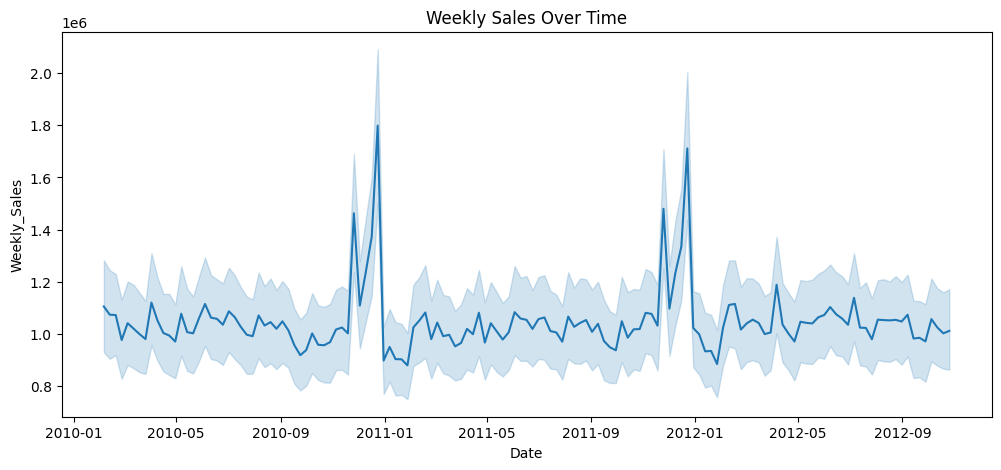

In [4]:
# Compare seasonal patterns and weekly patterns
plt.figure(figsize=(12,5))
sns.lineplot(data=df,x='Date',y='Weekly_Sales')
plt.title("Weekly Sales Over Time")
plt.show()

# Overal Trend and baseline -- 
Overall weekly sales remain relatively stable between Jan-Nov from 2010-2012, fluctuating around 1.0–1.2 million.
# Seasonal patterns --
 Sharp peaks occur at the end of each year(around end November to December), indicating strong holiday-driven demand, and sales decreased below the average baseline immediately after holiday period. 
# Yearly repetition --
These spikes and dips follow a repeated annual pattern, confirming strong seasonality in sales behavior.


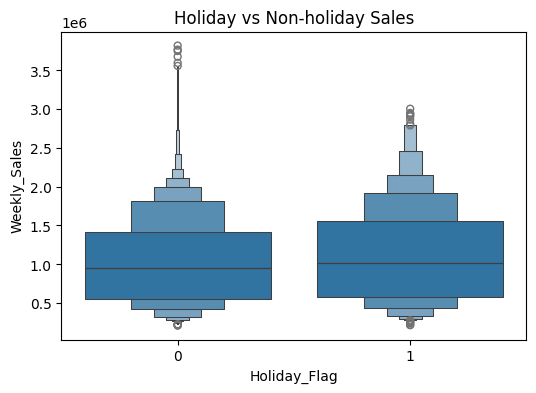

In [5]:
# Compare holiday and non-holiday sales
plt.figure(figsize=(6,4))
sns.boxenplot(data=df,x='Holiday_Flag',y='Weekly_Sales')
plt.title("Holiday vs Non-holiday Sales")
plt.show()

> Contrary to the common assumption that holidays drive massive sales spikes, the data reveals that the difference in weekly sales between holiday and non-holiday periods is surprisingly modest. What might be the reason ?
1. Holidays are not a guaranteed massive revenue driver on their own 
2. Other factors are more likely to influence sales than whether a week contains a holiday
it could be :  holiday in weekend or not ? Was the holiday supported by a major makerting compaign ? Super bowl week compare with other holiday? overall economic climate ?
It might be other factors

In [6]:
# Focus on Weekly_Sales correlations only
sales_corr = df.corr(numeric_only=True)["Weekly_Sales"].sort_values(ascending=True)
print("General sales corr:",sales_corr)

sales_corr_holiday = df_holiday.corr(numeric_only=True)["Weekly_Sales"].sort_values(ascending=True)
print("Holiday sales corr",sales_corr_holiday)

sales_corr_non_holiday = df_non_holiday.corr(numeric_only=True)["Weekly_Sales"].sort_values(ascending=True)
print("Non holiday sales corr",sales_corr_non_holiday)

General sales corr: Store          -0.335332
Unemployment   -0.106176
CPI            -0.072634
Temperature    -0.063810
Fuel_Price      0.009464
Holiday_Flag    0.036891
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64
Holiday sales corr Store          -0.343159
Unemployment   -0.096566
CPI            -0.080970
Temperature    -0.038753
year           -0.003908
week            0.022567
Fuel_Price      0.045589
Weekly_Sales    1.000000
Holiday_Flag         NaN
Name: Weekly_Sales, dtype: float64
Non holiday sales corr Store          -0.335092
Unemployment   -0.107566
CPI            -0.071940
Temperature    -0.060720
year           -0.017320
week            0.006267
Fuel_Price      0.009951
Weekly_Sales    1.000000
Holiday_Flag         NaN
Name: Weekly_Sales, dtype: float64


> macro-economic factors (CPI, Unemployment) and store-specific effects are more consistently (inversely) related to sales than holidays or fuel price.
> Holiday_Flag has very weak positive correlation with sales 
> Store has the stronget negative correlation with sales , which means The correlation suggests that higher-numbered stores have systematically lower sales than lower-numbered stores
(Store location ,size, or management). 
# Strategies : 
1. Investigation should focus on why lower-numbered stores outperform higher-numbered ones. Is it location? size? local demographics? This is your biggest lever for improving performance. 

2. The Economy is a Background Drag: Weaker economic conditions (higher Unemployment and CPI) consistently correlate with lower sales. This is an external factor you can't control, but you can use it for forecasting. In poor economic times, you should expect a slight dip in sales.

3. Holidays are Overrated (as a simple binary): The data strongly suggests that simply having a holiday does not cause a sales spike. The type of holiday (e.g., Christmas vs. Thanksgiving) and, more importantly, the promotions and events run during those weeks are what actually drive sales. The holiday is just a date on the calendar; the marketing strategy is the real driver. 

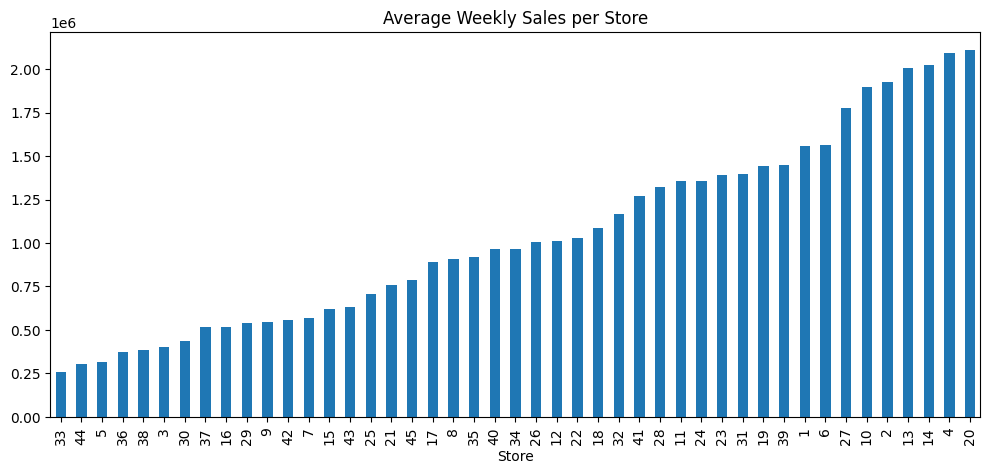

In [7]:
# ----- Sales by Store -----
sales_by_store = df.groupby("Store")["Weekly_Sales"].mean().sort_values()
sales_by_store.plot(kind="bar", figsize=(12,5))
plt.title("Average Weekly Sales per Store")
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Aggregate Store-Level Metrics
store_summary = df.groupby("Store").agg(
    mean_sales =("Weekly_Sales","mean"),
    median_sales =("Weekly_Sales","median"),
    sales_var =("Weekly_Sales","var"),
    sales_std = ("Weekly_Sales","std"),
    holiday_sales =("Weekly_Sales", lambda x: df.loc[x.index, "Holiday_Flag"].mul(x).sum()/df.loc[x.index, "Holiday_Flag"].sum()),
    nonholiday_sales=("Weekly_Sales", lambda x: df.loc[x.index, "Weekly_Sales"][df.loc[x.index,"Holiday_Flag"]==0].mean())
).reset_index()

"""
Mean/median sales → size of the store (volume).

Variance/Std Dev → volatility of sales (stable vs unstable).

Holiday vs Non-Holiday Sales → sensitivity to holidays.
"""

# % increase in sales during holidays, and which store benifits the most from holiday
store_summary["holiday_uplift"]=(store_summary['holiday_sales'] - store_summary['nonholiday_sales'])/store_summary['nonholiday_sales']
store_summary = store_summary.drop(columns=["holiday_sales", "nonholiday_sales"])
store_summary.columns = ["Store","mean_sales","sales_std","median_sales","sales_var","holiday_uplift"]
store_summary.head()


,Store,mean_sales,sales_std,median_sales,sales_var,holiday_uplift
0,1,1.555264e+06,1534849.64,2.433000e+10,155980.767761,0.076790
1,2,1.925751e+06,1879107.31,5.649354e+10,237683.694682,0.086228
2,3,4.027044e+05,395107.35,2.145508e+09,46319.631557,0.094350
3,4,2.094713e+06,2073951.38,7.086321e+10,266201.442297,0.076574
4,5,3.180118e+05,310338.17,1.424154e+09,37737.965745,0.141665


In [9]:
# Store Segmentation using unsupervised learning (Kmeans or Hierarchical clustering)
# select features for clustering 

X = store_summary[["mean_sales","sales_std","holiday_uplift"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4,random_state=42)
store_summary["Clusters"] = kmeans.fit_predict(X_scaled)


# define clusters assignment logic
# 1. Profile the clusters
cluster_profile = store_summary.groupby("Clusters").agg({
    "mean_sales":"median",
    "holiday_uplift":"median"
}).reset_index()

# 2. Define thresholds for high/low
sales_median = cluster_profile["mean_sales"].median()
uplift_median = cluster_profile["holiday_uplift"].median()

# 3. Categorize clusters using your rules
def assign_category(row):
    if row['mean_sales'] > sales_median and row["holiday_uplift"] <= uplift_median:
        return "Flagstore"
    elif row['mean_sales'] >= sales_median and row['holiday_uplift'] >= uplift_median:
        return "Regional store"
    elif row['mean_sales'] <= sales_median and row['holiday_uplift'] > uplift_median:
        return "Local store"
    else:
        return "Rural store"
    
cluster_profile["Category"] = cluster_profile.apply(assign_category, axis=1)

#4 create mapping dict
cluster_map = dict(zip(cluster_profile['Clusters'],cluster_profile['Category']))

# 5 add back to full dataset
store_summary["Cluster_Category"] = store_summary["Clusters"].map(cluster_map)

print(cluster_profile) 
# 0 - Local store, high holiday uplift
# 2 - Flagstore, median holiday uplift
# 3 - Regional store, median holiday uplift
# 1 - Rural store low-negative holiday uplift 
# 0-local,1-rural,2-flag,3-regional


   Clusters    mean_sales  holiday_uplift        Category
0         0  5.969649e+05        0.120161     Local store
1         1  4.385796e+05       -0.004216     Rural store
2         2  2.003620e+06        0.072476       Flagstore
3         3  1.323522e+06        0.076790  Regional store


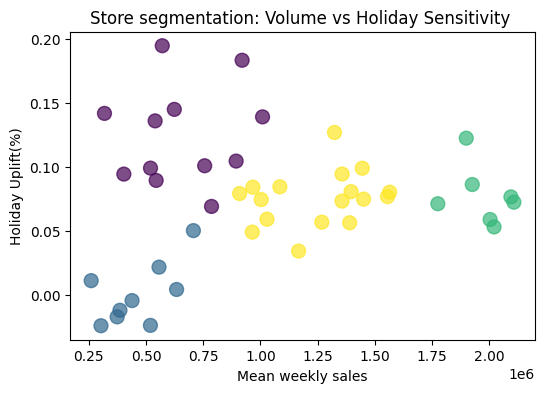

In [10]:
# Visualize by scatter plot 
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(store_summary["mean_sales"],store_summary["holiday_uplift"],c=store_summary["Clusters"],cmap="viridis", s=100, alpha=0.7)
plt.xlabel("Mean weekly sales")
plt.ylabel("Holiday Uplift(%)")
plt.title("Store segmentation: Volume vs Holiday Sensitivity ")
plt.show()

In [11]:
# merge cluster/category info back into the original df
df = df.merge(
    store_summary[['Store','Clusters','Cluster_Category']],
    on="Store",
    how="left"
)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Clusters,Cluster_Category
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,3,Regional store
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,3,Regional store
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,3,Regional store
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,3,Regional store
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,Regional store


### 🔑 Steps to forecast sales by cluster category

1. Add cluster info to your original df (you’ve already merged Cluster_Category).

2. Aggregate sales by cluster and time period (weekly or daily).

3. Format for Prophet (ds = date, y = sales).

4. Train a Prophet model per cluster category.

5. Forecast future sales per cluster.

6. (Optional) Combine forecasts for a full view or for promo timing optimization.

/Users/irisvitalee/Documents/ML-AI projects/Project2-Revenue Optimization/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
10:04:14 - cmdstanpy - INFO - Chain [1] start processing
10:04:14 - cmdstanpy - INFO - Chain [1] done processing


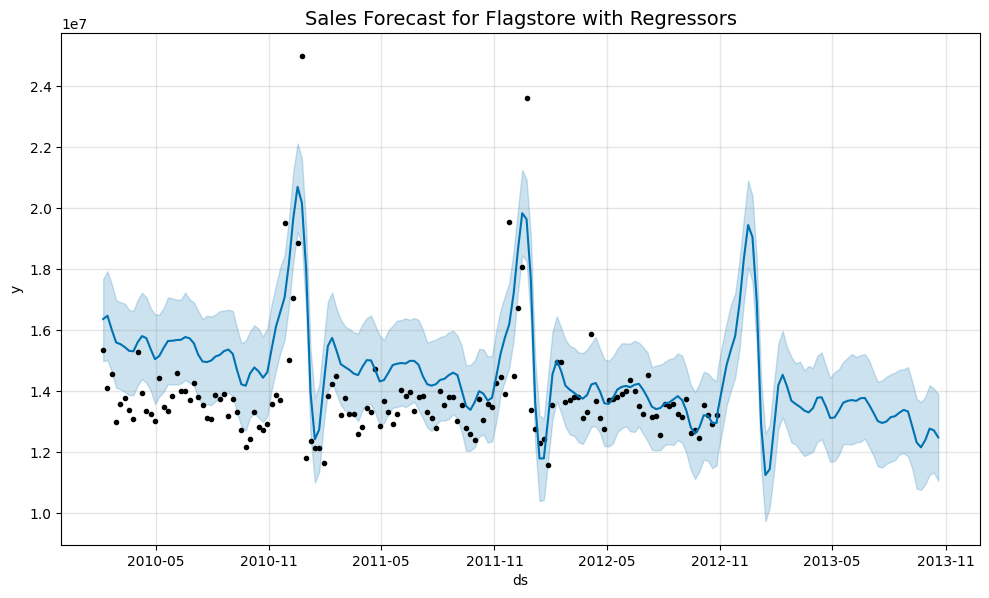

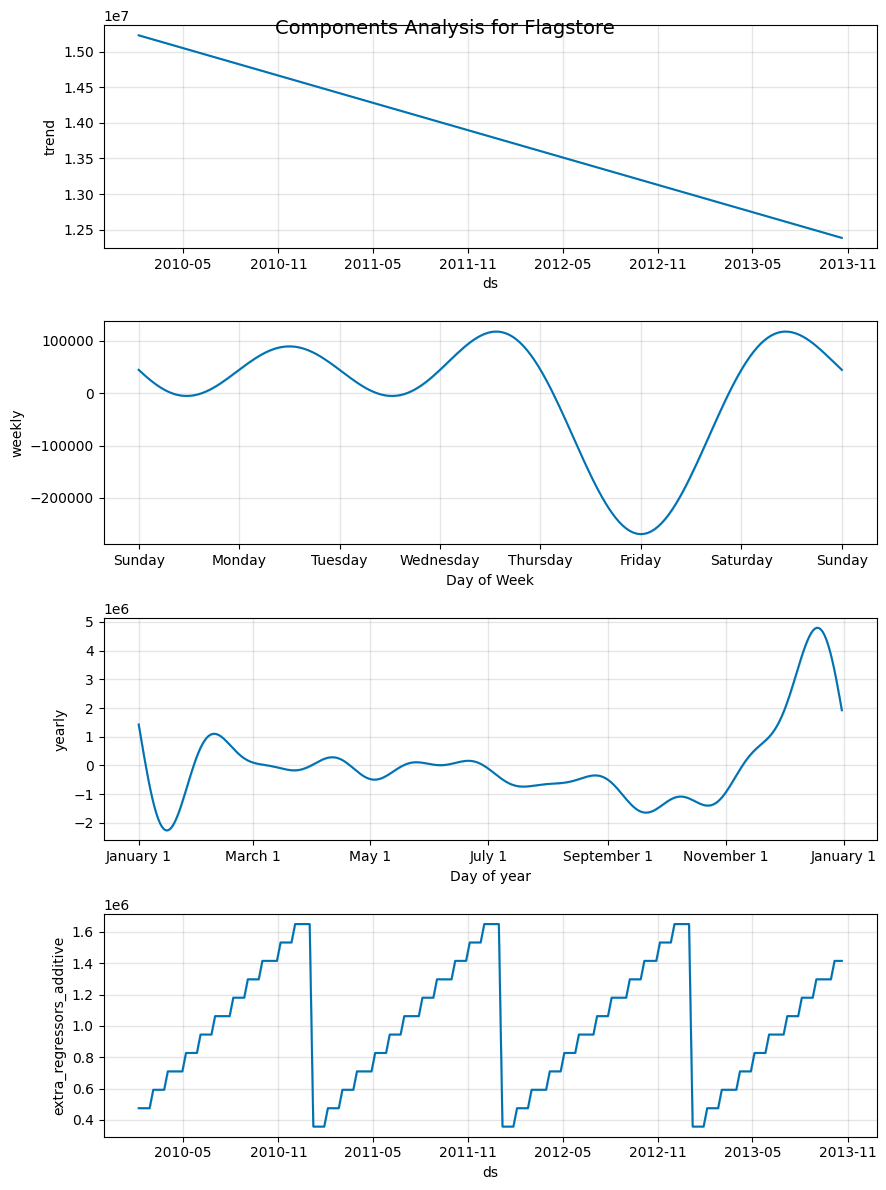

10:04:14 - cmdstanpy - INFO - Chain [1] start processing
10:04:14 - cmdstanpy - INFO - Chain [1] done processing


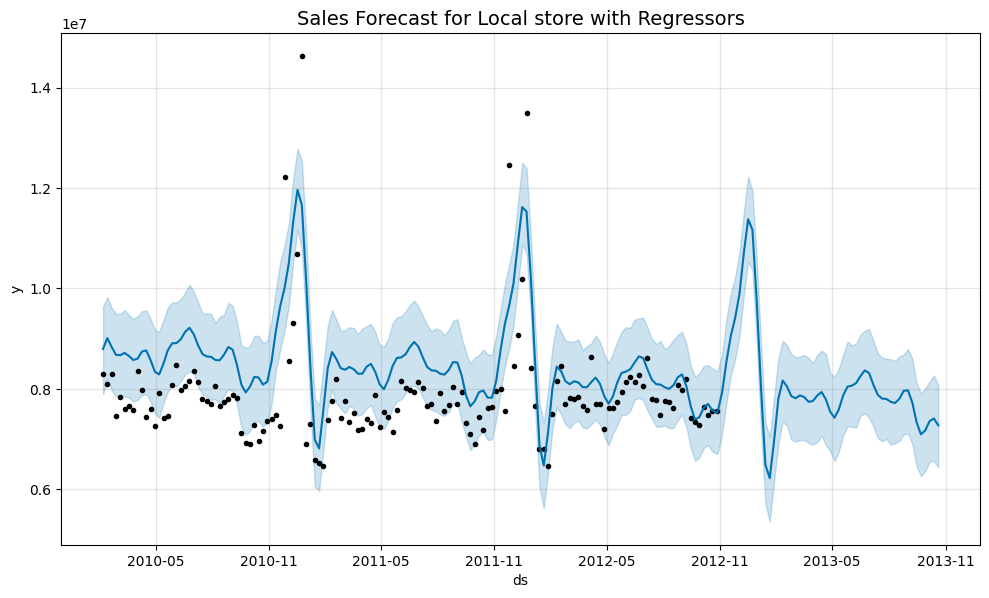

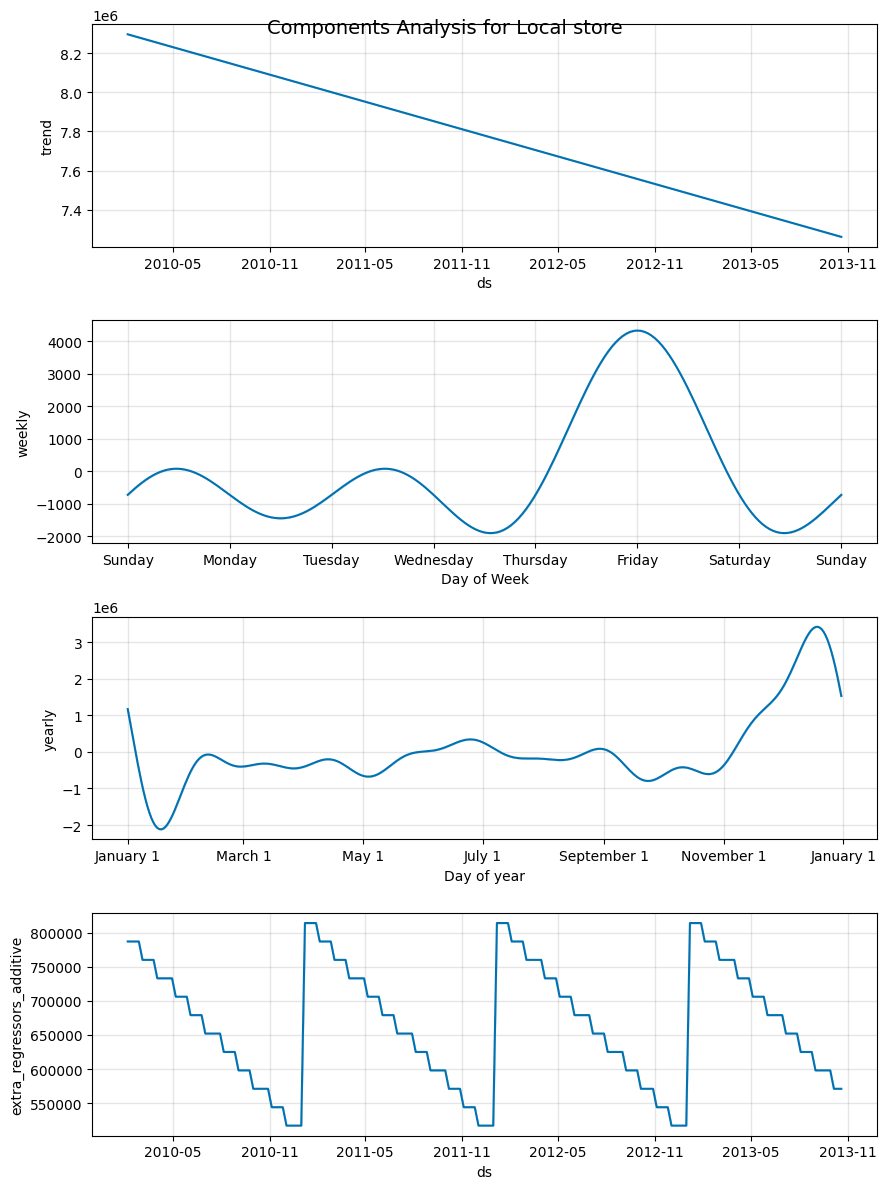

10:04:15 - cmdstanpy - INFO - Chain [1] start processing
10:04:15 - cmdstanpy - INFO - Chain [1] done processing


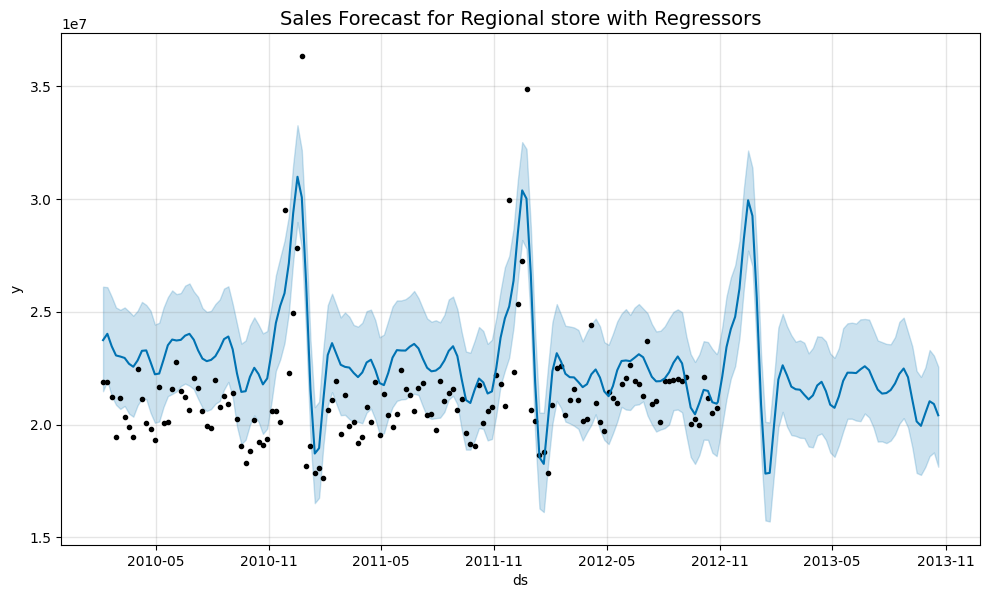

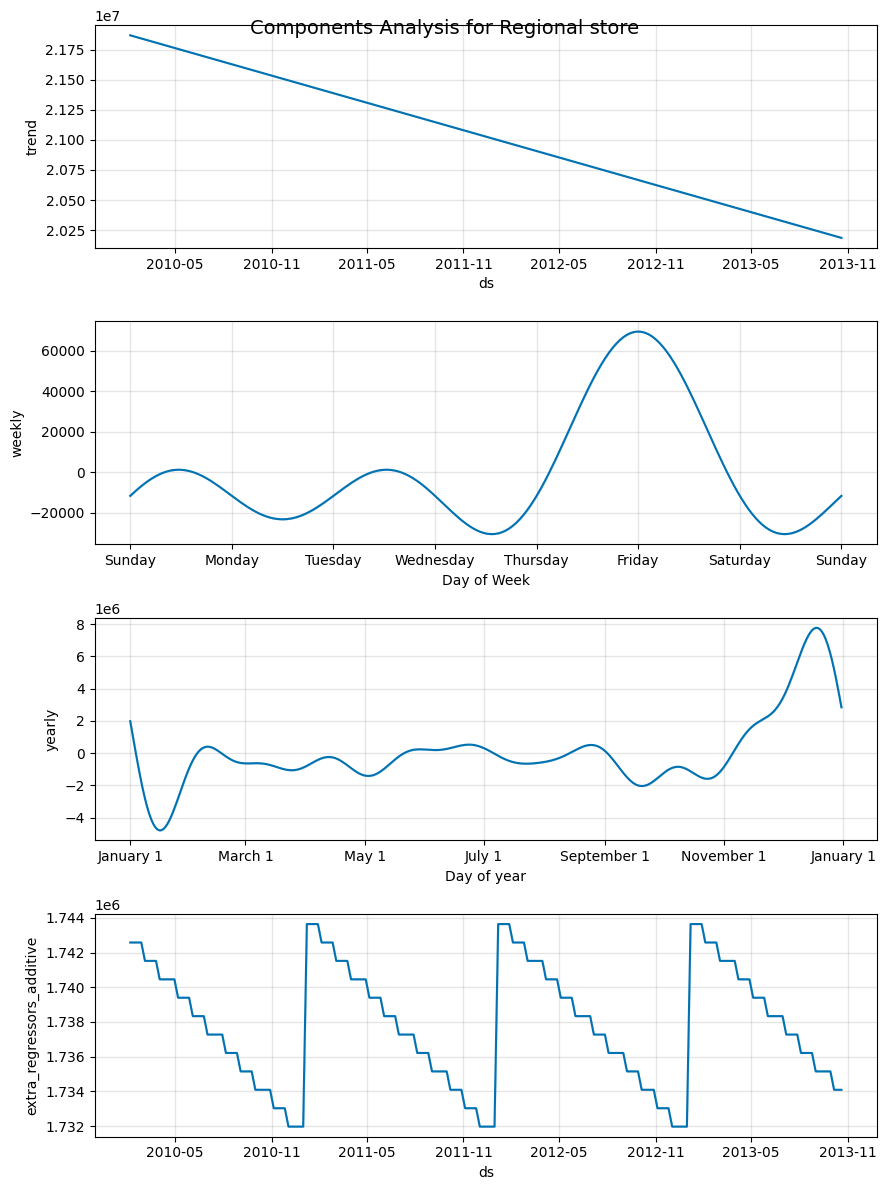

10:04:15 - cmdstanpy - INFO - Chain [1] start processing
10:04:15 - cmdstanpy - INFO - Chain [1] done processing


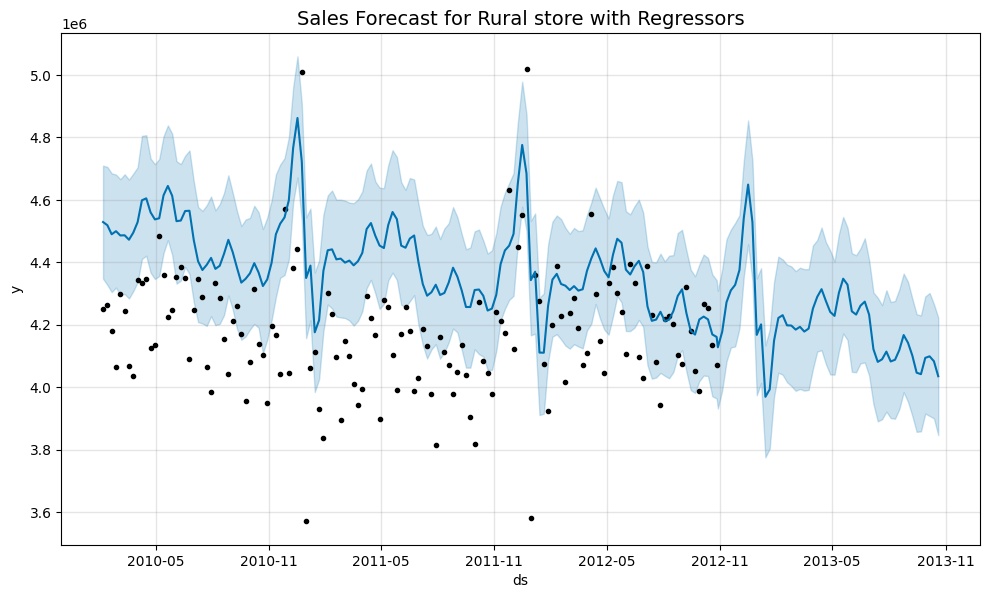

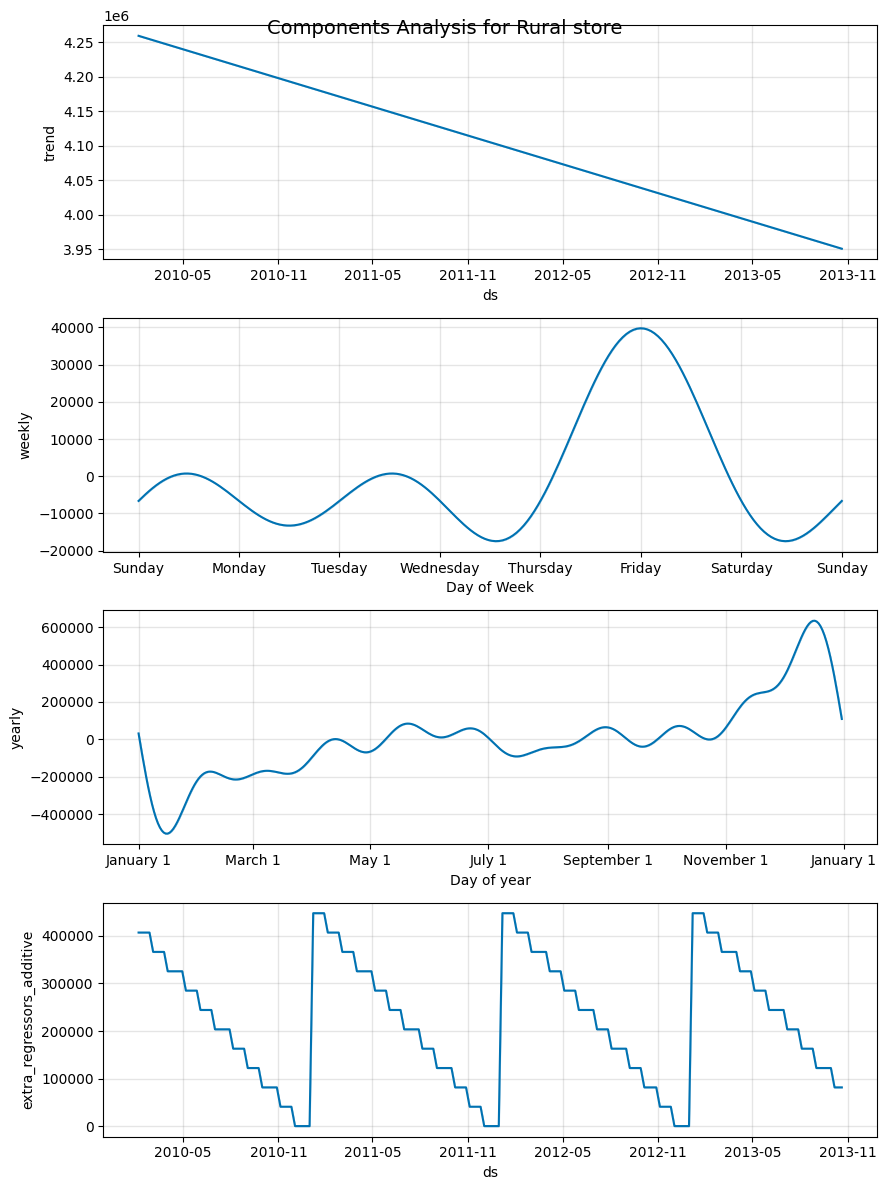

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from prophet import Prophet
import plotly.express as px

# aggregate sales by cluster and date 
cluster_sales = (
     df.groupby(['Cluster_Category','Date'])['Weekly_Sales'].sum().reset_index()
)

# Merge with original dataframe to get regressors
df_with_features = df.groupby(['Cluster_Category','Date']).agg({
     'Weekly_Sales':'sum',
     'Holiday_Flag':'max',
     'Unemployment':'mean',
     'CPI':'mean',
     'Fuel_Price':'mean'
}).reset_index()

# create additional features that might be useful 
df_with_features['Month'] = pd.to_datetime(df_with_features['Date']).dt.month

# forcaste per cluster category
forecast_results = {}

for cluster in df_with_features['Cluster_Category'].unique():
     # Prepare data for prophet
     df_cluster = df_with_features[df_with_features['Cluster_Category'] == cluster]
     
     df_prophet = df_cluster.rename(columns = {"Date":"ds","Weekly_Sales":"y"})
     
     # Fit prophet model 
     model = Prophet(growth='linear', # Force linear growth
                     changepoint_prior_scale=0.005,  # Much lower (default is 0.05)
                     n_changepoints=5,               # Fewer changepoints
                     changepoint_range=0.8,           # Don't use the very end for trend setting
                     yearly_seasonality=True, 
                     weekly_seasonality=True,
                     daily_seasonality=False,
     )
     
     # add regressors 
     model.add_regressor('Holiday_Flag')
     model.add_regressor('Unemployment')
     model.add_regressor('CPI')
     model.add_regressor('Month')
     model.add_regressor('Fuel_Price')
     
     model.fit(df_prophet[['ds','y','Holiday_Flag','Unemployment','CPI','Month','Fuel_Price']])
     
     # Create future dataframe (forecast 52 weeks ahead)
     future = model.make_future_dataframe(periods=52,freq="W")
     
     # Prepare future regressor, need to provide future values
     # such as last available values
     last_values = df_cluster.iloc[-1]
     
     # Add regressor to future dataframe 
     future['Holiday_Flag'] = 0  # Default to non-holiday, adjust as needed
     future['Unemployment'] = last_values['Unemployment']  # Use last known value
     future['CPI'] = last_values['CPI']  # Use last known value
     future['Fuel_Price'] = last_values['Fuel_Price']
     future['Month'] = future['ds'].dt.month
     
     forecast = model.predict(future)
     
     forecast_results[cluster]=(model,forecast,df_prophet)
     
     # plot forecast for each cluster
     fig = model.plot(forecast)
     plt.title(f"Sales Forecast for {cluster} with Regressors",fontsize=14)
     
     # Plot component analysis to see regressor effects
     fig2=model.plot_components(forecast)
     plt.suptitle(f"Components Analysis for {cluster}",fontsize=14)
     
     plt.show()

1. All the shops are trending down,  might indicate genuine declining sales trends across clusters(changing customer preferences, competition, saturation?), economic downturn effects ? or data issue/bias
⚠️ Suggestion:
Validate whether it’s a real business trend or a data artifact. Cross-check with external data (GDP, retail sales index).

2. All store has shown that Friday is the peak(payday alignment, promotions, or cultural habit)
⚠️ Suggestion:
Optimize promotions/stocking on Fridays.
Consider extending staffing hours,ensure stock availability Thu-Fri, or marketing campaigns to capture Friday momentum.

3. All store shows that holiday-driven seasonal cycle:Nov–Dec = peak demand (holiday shopping),Jan = sharp drop (post-holiday slowdown)
Retail cycle strongly driven by holiday promotions & seasonality(Black Friday + Christmas)
⚠️ Suggestion:
Use targeted promotions in Nov–Dec (boost revenue further).
Develop retention campaigns in Jan (avoid steep customer drop).
Test holiday uplift per cluster → urban vs rural may differ.


/var/folders/9v/_p3v26m97tz_mmc4tdysn_6h0000gn/T/ipykernel_37403/1927877512.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  macro_data = macro_data.resample("M").mean()
/var/folders/9v/_p3v26m97tz_mmc4tdysn_6h0000gn/T/ipykernel_37403/1927877512.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Flagstore_trend = Flagstore_fcst[['ds','trend']].set_index('ds').resample('M').mean()
/var/folders/9v/_p3v26m97tz_mmc4tdysn_6h0000gn/T/ipykernel_37403/1927877512.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Regional_trend = Regional_fcst[['ds','trend']].set_index('ds').resample('M').mean()
/var/folders/9v/_p3v26m97tz_mmc4tdysn_6h0000gn/T/ipykernel_37403/1927877512.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Local_trend = Local_fcst[['ds','trend']].set_inde

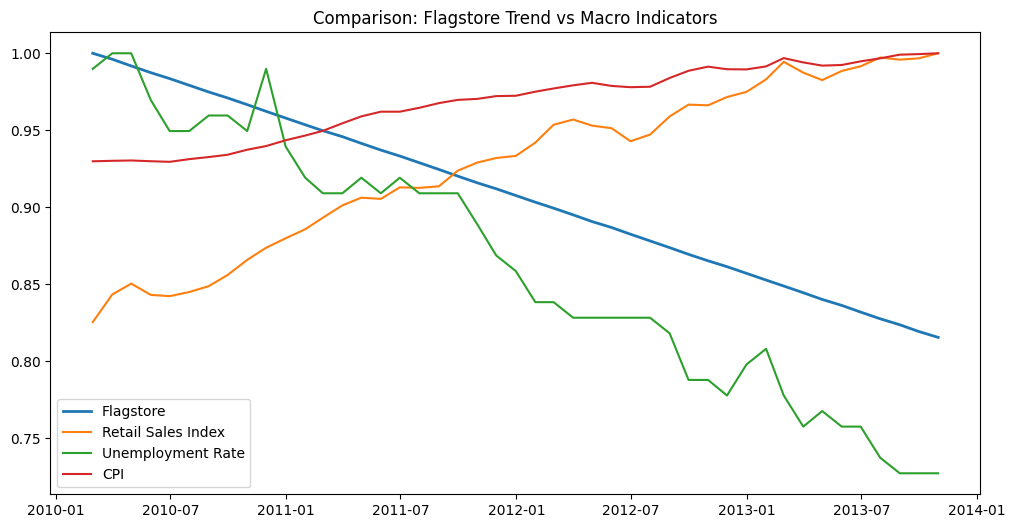

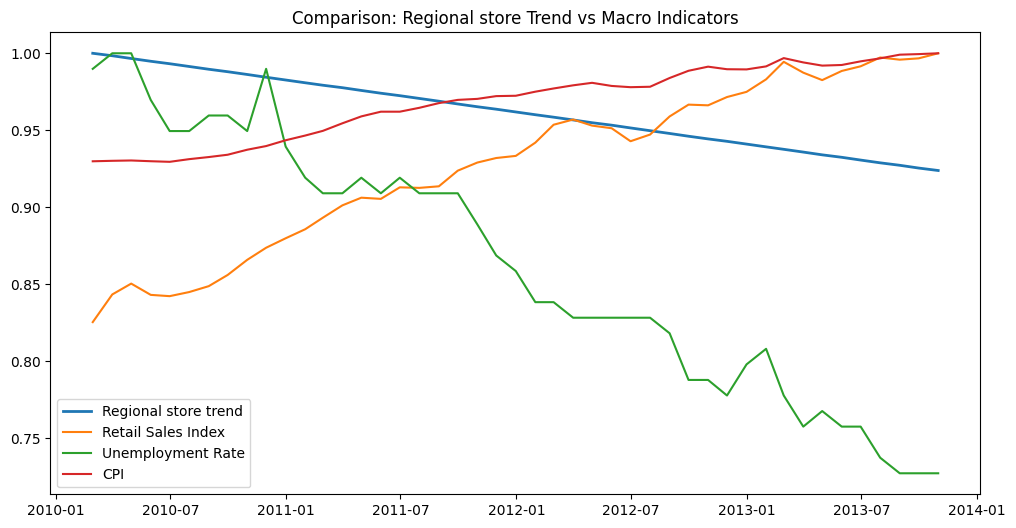

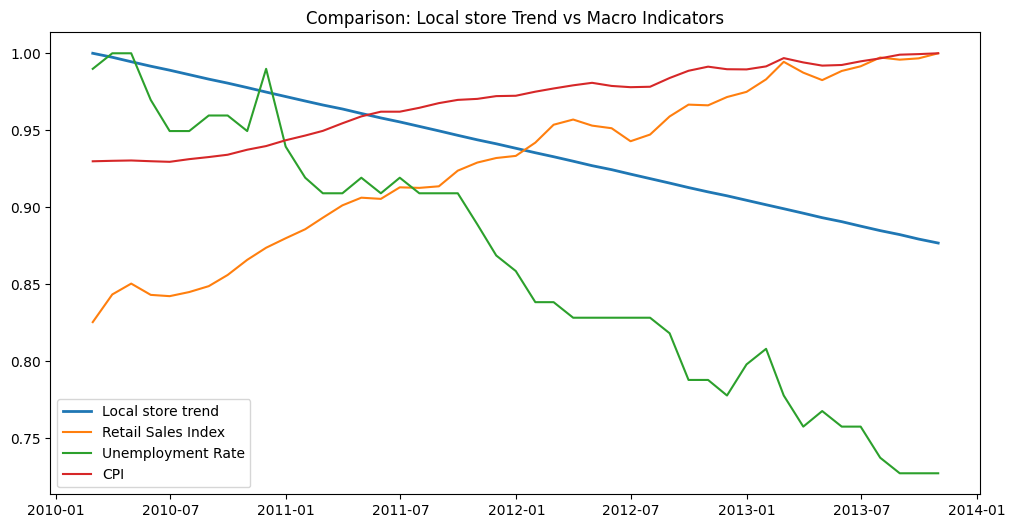

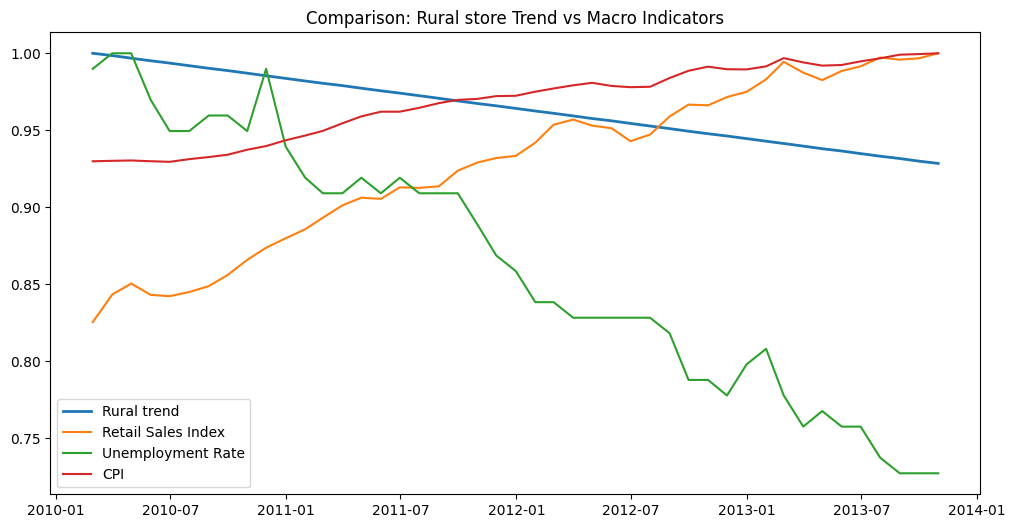

In [13]:
# Check and validate the sales trending down with macro market(retail index, unemployment and inflation etc)
from fredapi import Fred

# 1. Connect to FRED
fred = Fred(api_key="2991e539c6491edffa341a08ad95a396")

# 2. Pull macroeconomic series
# Retail Sales (Advance Retail Sales: General Merchandise Stores, NSA)
retail = fred.get_series("RSAFS", observation_start="2010-01-01")

# Unemployment Rate (monthly, %)
unemp = fred.get_series("UNRATE", observation_start="2010-01-01")

# Consumer Price Index (All Urban Consumers, CPI-U)
cpi = fred.get_series("CPIAUCSL", observation_start="2010-01-01")

# 3. Combine into DataFrame
macro_data = pd.concat([retail, unemp, cpi], axis=1)
macro_data.columns = ["RetailSales", "Unemployment", "CPI"]

# 4. Preprocess (monthly)
macro_data = macro_data.resample("M").mean()


#5. Prophet trend (from your forecast_results)
# 0-local,1-rural,2-flag,3-regional
Flagstore_fcst  = forecast_results['Flagstore'][1]
Local_fcst      = forecast_results['Local store'][1]
Regional_fcst   = forecast_results['Regional store'][1]
Rural_fcst      = forecast_results['Rural store'][1]

Flagstore_trend = Flagstore_fcst[['ds','trend']].set_index('ds').resample('M').mean()
Regional_trend = Regional_fcst[['ds','trend']].set_index('ds').resample('M').mean()
Local_trend = Local_fcst[['ds','trend']].set_index('ds').resample('M').mean()
Rural_trend= Rural_fcst[['ds','trend']].set_index('ds').resample('M').mean()

# 6. Merge macro + trend
df_compare_flag= pd.concat([Flagstore_trend,macro_data],axis=1).dropna()
df_compare_reginal = pd.concat([Regional_trend,macro_data],axis=1).dropna()
df_compare_local = pd.concat([Local_trend,macro_data],axis=1).dropna()
df_compare_rural = pd.concat([Rural_trend,macro_data],axis=1).dropna()

# 7. Normalize for comparison

df_flag = df_compare_flag / df_compare_flag.max()
df_regional = df_compare_reginal / df_compare_reginal.max()
df_local = df_compare_local/ df_compare_local.max()
df_rural = df_compare_rural / df_compare_rural.max()


# 8. Plot
plt.figure(figsize=(12,6))
plt.plot(df_flag.index,df_flag['trend'],label='Flagstore',linewidth=2)
plt.plot(df_flag.index, df_flag["RetailSales"], label="Retail Sales Index")
plt.plot(df_flag.index, df_flag["Unemployment"], label="Unemployment Rate")
plt.plot(df_flag.index, df_flag["CPI"], label="CPI")
plt.legend()
plt.title("Comparison: Flagstore Trend vs Macro Indicators")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df_regional.index,df_regional['trend'],label='Regional store trend',linewidth=2)
plt.plot(df_regional.index, df_regional["RetailSales"], label="Retail Sales Index")
plt.plot(df_regional.index, df_regional["Unemployment"], label="Unemployment Rate")
plt.plot(df_regional.index, df_regional["CPI"], label="CPI")
plt.legend()
plt.title("Comparison: Regional store Trend vs Macro Indicators")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df_local.index,df_local['trend'],label='Local store trend',linewidth=2)
plt.plot(df_local.index, df_local["RetailSales"], label="Retail Sales Index")
plt.plot(df_local.index, df_local["Unemployment"], label="Unemployment Rate")
plt.plot(df_local.index, df_local["CPI"], label="CPI")
plt.legend()
plt.title("Comparison: Local store Trend vs Macro Indicators")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df_rural.index,df_rural['trend'],label='Rural trend',linewidth=2)
plt.plot(df_rural.index, df_rural["RetailSales"], label="Retail Sales Index")
plt.plot(df_rural.index, df_rural["Unemployment"], label="Unemployment Rate")
plt.plot(df_rural.index, df_rural["CPI"], label="CPI")
plt.legend()
plt.title("Comparison: Rural store Trend vs Macro Indicators")
plt.show()

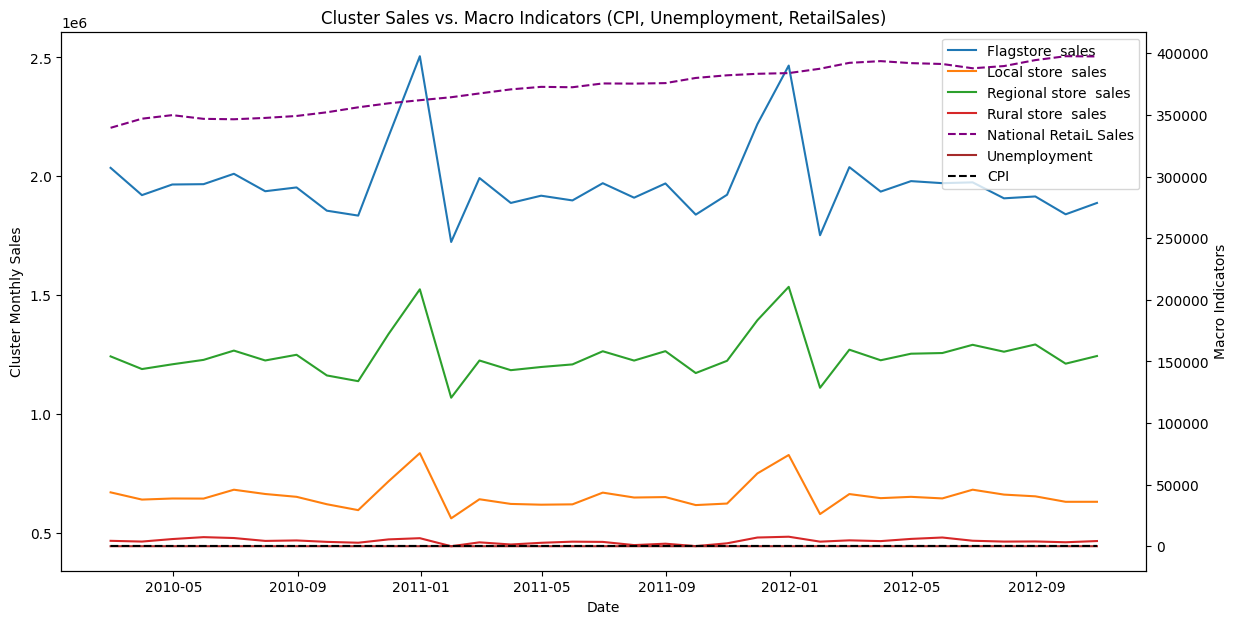

In [14]:
"""
Cluster-level sales (weekly).macro data(monthly), to combine :
1. Resample sales to monthly (since macro data is monthly).
2. Merge macro data into sales dataframe by Date.
3. Plot sales per cluster vs CPI, Unemployment, RetailSales.
"""

df['Date'] = pd.to_datetime(df['Date'])
# ---Step1 Prepare cluster sale 
# Monthly aeverage sales per cluster
cluster_sales = df.groupby(['Date', 'Cluster_Category'])['Weekly_Sales'].mean().reset_index()

cluster_monthly = (cluster_sales.groupby(
    ['Cluster_Category',pd.Grouper(key='Date',freq='ME')])['Weekly_Sales']
                   .mean().reset_index())

# Pivot so each cluster is its own column
cluster_pivot = cluster_monthly.pivot(index='Date',columns='Cluster_Category',values='Weekly_Sales')

# ---Step2 Load and merge macro data
macro_data.index = pd.to_datetime(macro_data.index)
macro_df = macro_data.resample('ME').mean()  # ensure monthly

combine = cluster_pivot.merge(macro_df,left_index=True,right_index=True,how='inner')


# ---- Step4 Plot 
fig,ax1= plt.subplots(figsize=(14,7))

# plot sales per cluster
for col in cluster_pivot.columns:
    ax1.plot(combine.index,combine[col],label=f"{col}  sales")
ax1.set_ylabel('Cluster Monthly Sales')
ax1.set_xlabel("Date")
ax1.legend(loc='upper left')

# Plot macro indicators (right y-axis)
ax2 = ax1.twinx()
ax2.plot(combine.index,combine['RetailSales'],color='purple',linestyle="--",label='National RetaiL Sales')
ax2.plot(combine.index,combine['Unemployment'],color='brown',label='Unemployment')
ax2.plot(combine.index,combine['CPI'],color='black',linestyle="--",label='CPI')
ax2.set_ylabel("Macro Indicators")

# Merge legends 
lines1, labels1 = ax1.get_legend_handles_labels()
lines2,labels2 =ax2.get_legend_handles_labels()
ax1.legend(lines1+lines2,labels1+labels2,loc='upper right')

plt.title("Cluster Sales vs. Macro Indicators (CPI, Unemployment, RetailSales)")
plt.show()

### Insights
Combine both plots(The trend vs macro data and sales vs macro date) together they tell a powerful story:
> Actual Data Plot: Shows you underperformed the market (sales ↓ while macro ↑)

>Prophet Forecast: Shows the model learned your downward trend and projects it

Macro vs. Company Performance (2010-2012)
- 📈 National Retail Sales: +17% (Strong market growth)
- 📉 Unemployment: -25% (More consumer spending power)
- 📈 CPI: +7% (Moderate inflation, healthy economy)
Market!
- 📉 Rural stores: -35% (52-point gap vs. market!)
- 📉 Flag stores: -30% (47-point gap vs. market!)
- 📉 Local stores: -20% (37-point gap vs. market!)
- 📉 Regional stores: -15% (32-point gap vs. market!)

In [15]:
# Cluster-by-Cluster Underperformance Analysis Framework
# step 1 - Performance Gap Analysis 
# A. Market vs. Store Performance Comparison

def calculate_performance_gap(df):
    # define analysis period (2010-2012 decline)
    analysis_period = (df['Date']>=df['Date'].min()) & (df['Date']<=df['Date'].max())
    
    performance_summary={}
    
    for cluster_category in df['Cluster_Category'].unique():
        cluster_data = df[df['Cluster_Category']==cluster_category].copy()
        print(f"Analyzing {cluster_category}")
        print(f"total records: {len(cluster_data)}")
        
        # calculate cluster performance during deline period
        cluster_2010 = cluster_data[cluster_data['Date'].dt.year == 2010]['Weekly_Sales'].mean()
        cluster_2012 =cluster_data[cluster_data['Date'].dt.year == 2012]['Weekly_Sales'].mean()
        
        # calculate percentage change 
        if cluster_2010 > 0:
            sales_change_pct = ((cluster_2012-cluster_2010) / cluster_2010)*100
        else:
            sales_change_pct = 0
        print(f"sales changes: {sales_change_pct}")
        
        # compare to macro conditions
        national_retail_growth = 15.0
        unemployment_decline = -22.0
        
        vs_national_retail = sales_change_pct - national_retail_growth
        vs_unemployment = sales_change_pct - unemployment_decline
        
        performance_summary[cluster_category] = {
            'sales_decline_pct':round(sales_change_pct,1),
            'vs_national_retail':round(vs_national_retail,1), 
            'vs_unemployment':round(vs_unemployment,1), 
            'performance_gap':round(vs_national_retail,1),   
            'severity_score':round(abs(vs_national_retail)/10,2),
            'avg_2010_sales':round(cluster_2010,0),
            'avg_2012_sales':round(cluster_2012,0),
            'store_count':len(cluster_data['Store'].unique())
        }
        
        print(f"Performance gap vs market : {vs_national_retail:.1f} % ")
        print(f"Severity score : {abs(vs_national_retail)/10:.2f}")
        print("")
        
calculate_performance_gap(df)

Analyzing Regional store
total records: 2431
sales changes: -0.7933965649014675
Performance gap vs market : -15.8 % 
Severity score : 1.58

Analyzing Flagstore
total records: 1001
sales changes: -4.759267994011777
Performance gap vs market : -19.8 % 
Severity score : 1.98

Analyzing Local store
total records: 1716
sales changes: -3.785749834315159
Performance gap vs market : -18.8 % 
Severity score : 1.88

Analyzing Rural store
total records: 1287
sales changes: -0.5907779757748307
Performance gap vs market : -15.6 % 
Severity score : 1.56



### Insights 
1. Rural store performed best!,Flagstore were worst performed(Rural store -0.6%, FLagstore -4.8%)
2. All stores underperformed but not catastrophically (-0.6% ~ -4.8%)
> Prophet trend component: Declining by 28% (severe pessimism)
> Actual sales: Only declined 4.8% (much more stable)
- Prophet Trend = Underlying business trajectory (long-term direction)
- Actual Sales = Trend + Seasonality + Holiday effects + Noise

Why ? 
If Trend drops 28% but Sales only drop 4.8%, it means:
- Seasonality/Holiday effects are MASSIVELY compensating (+23 pts)
- OR Prophet trend is severely wrong
- OR Model is misinterpreting the data structure

In [16]:
def diagnose_prophet_trend_issue(model, forecast):
    """Check why Prophet trend is so pessimistic"""
    
    # Extract components
    forecast_components = model.predict(future)
    
    print("=== PROPHET COMPONENT ANALYSIS ===")
    
    # Check trend contribution
    trend_start = forecast_components['trend'].iloc[0]
    trend_end = forecast_components['trend'].iloc[-52]  # Last year of historical
    trend_change = ((trend_end - trend_start) / trend_start) * 100
    
    print(f"Prophet trend change: {trend_change:.1f}%")
    
    # Check if other components are compensating
    if 'seasonal' in forecast_components.columns:
        seasonal_impact = forecast_components['seasonal'].std()
        print(f"Seasonal volatility: {seasonal_impact:.0f}")
    
    # Check regressor impact
    for regressor in ['CPI', 'Unemployment']:
        if regressor in forecast_components.columns:
            regressor_impact = forecast_components[regressor].iloc[-1] - forecast_components[regressor].iloc[0]
            print(f"{regressor} total impact: {regressor_impact:.0f}")
    
    # The key insight:
    total_forecast_change = forecast_components['yhat'].iloc[-1] - forecast_components['yhat'].iloc[0]
    print(f"Total forecast change: {(total_forecast_change / forecast_components['yhat'].iloc[0] * 100):.1f}%")
    
    return forecast_components.head()

diagnose_prophet_trend_issue(model,forecast)

=== PROPHET COMPONENT ANALYSIS ===
Prophet trend change: -5.3%
CPI total impact: 0
Unemployment total impact: 0
Total forecast change: -10.9%


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,CPI,CPI_lower,CPI_upper,Fuel_Price,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,4.259564e+06,4.346097e+06,4.725938e+06,4.259564e+06,4.259564e+06,-127554.705591,-127554.705591,-127554.705591,-37673.46117,...,39774.761799,39774.761799,39774.761799,-176875.551796,-176875.551796,-176875.551796,0.0,0.0,0.0,4.529037e+06
1,2010-02-12,4.257968e+06,4.330954e+06,4.702419e+06,4.257968e+06,4.257968e+06,-127554.705591,-127554.705591,-127554.705591,-37673.46117,...,39774.761799,39774.761799,39774.761799,-185427.114108,-185427.114108,-185427.114108,0.0,0.0,0.0,4.518889e+06
2,2010-02-19,4.256372e+06,4.319544e+06,4.677034e+06,4.256372e+06,4.256372e+06,-127554.705591,-127554.705591,-127554.705591,-37673.46117,...,39774.761799,39774.761799,39774.761799,-212910.136161,-212910.136161,-212910.136161,0.0,0.0,0.0,4.489810e+06
3,2010-02-26,4.254776e+06,4.303549e+06,4.703624e+06,4.254776e+06,4.254776e+06,-127554.705591,-127554.705591,-127554.705591,-37673.46117,...,39774.761799,39774.761799,39774.761799,-201442.722919,-201442.722919,-201442.722919,0.0,0.0,0.0,4.499682e+06
4,2010-03-05,4.253180e+06,4.288914e+06,4.676413e+06,4.253180e+06,4.253180e+06,-127554.705591,-127554.705591,-127554.705591,-37673.46117,...,39774.761799,39774.761799,39774.761799,-172927.247806,-172927.247806,-172927.247806,0.0,0.0,0.0,4.485997e+06


### Insights 
1. CPI and Unemployment are not influencing the forecast, the sales driven by other factors not macro economics
2. Model detected an inherent downward trend in the business , it exists independently of macroeconomic cndition
3. seasonality_impact = -10.9 -(-5.3) , about -5.6%, so seasonality and other factors contributed additional decline


In [17]:
# 🔎 Driver Analysis with XGBoost

# Encode cluster as categorical if you want to model all together
df["Clusters"] = df["Clusters"].astype("category").cat.codes 

X = df[['Holiday_Flag','CPI','Unemployment','Fuel_Price','Clusters','Temperature']]
y = df['Weekly_Sales']
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import plot_importance


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

model = XGBRegressor(
    n_estimators=500,
    learning_rate =0.05,
    max_depth = 5,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42
)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('R2:',r2_score(y_test,y_pred))
print("RMSE:",mean_squared_error(y_test,y_pred,squared=False))

plot_importance(model,importance_type="gain")
plt.show()

R2: 0.6111803206862347


TypeError: got an unexpected keyword argument 'squared'

In [2012]:
# Prophet shows: -5.6% additional decline from seasonal/holiday effects
# Feature importance shows: Holiday_Flag ranked 5th (lower than expected)
# Opportunity: Restore holiday effectiveness = potential +5.6% recovery
# Store format (cluster) dominance: Different formats need different strategies

from pandas.tseries.holiday import USFederalHolidayCalendar

# Generate US Federal holidays for full range
date_range = pd.date_range(start=df['Date'].min(),end=df['Date'].max(),freq='D')
calendar = USFederalHolidayCalendar()
us_holidays = calendar.holidays(start=date_range.min(),end=date_range.max())

# Custom retail/sports events
custom_events = []

# Black Friday = day after Thanksgiving
thanksgiving = pd.date_range(start=date_range.min(),end=date_range.max(),freq='W-THU') # all thursdays
for d in thanksgiving:
    if d.month == 11 and (22 <= d.month <= 28):     # Thanksgiving range
        custom_events.append({'holiday':'Thanksgiving','ds':d})
        custom_events.append({'holiday':'BlackFriday','ds':d+pd.Timedelta(days=1)})
        custom_events.append({'holiday':'CyberMonday','ds':d+pd.Timedelta(days=4)})

# Chirstmas and New year
for year in range(date_range.min().year,date_range.max().year+1):
    custom_events.append({'holiday':'Christmas','ds':pd.Timestamp(f'{year}-12-25')})
    custom_events.append({'holiday':'NewYear','ds':pd.Timestamp(f'{year}-01-01')})
    
# Summer holidays
for year in range(date_range.min().year, date_range.max().year+1):
    custom_events.append({'holiday': 'MemorialDay', 'ds': pd.date_range(f'{year}-05-25', f'{year}-05-31', freq='D')[0]})
    custom_events.append({'holiday': 'IndependenceDay', 'ds': pd.Timestamp(f'{year}-07-04')})
    custom_events.append({'holiday': 'LaborDay', 'ds': pd.date_range(f'{year}-09-01', f'{year}-09-07', freq='D')[0]})
    
# Super Bowl (first Sunday in Feb, approx)
for year in range(date_range.min().year, date_range.max().year+1):
    feb_sundays = pd.date_range(f'{year}-02-01', f'{year}-02-07', freq='W-SUN')
    if len(feb_sundays) > 0:
        custom_events.append({'holiday': 'SuperBowl', 'ds': feb_sundays[0]})
        
# Build final holiday df
holidays=pd.DataFrame(custom_events)


In [2013]:
# Run prophet per cluster
holiday_summary = []

for cluster in df['Cluster_Category'].unique():
    cluster_for_holiday=df[df['Cluster_Category']==cluster].copy()
    prophet_holiday= cluster_for_holiday[['Date','Weekly_Sales']].rename(columns={'Date':'ds','Weekly_Sales':'y'})

    model1 = Prophet(holidays=holidays,
                                yearly_seasonality=True,
                                weekly_seasonality=False,
                                daily_seasonality=False,
                                changepoint_prior_scale=0.005,  # Much lower (default is 0.05)
                                n_changepoints=5,               # Fewer changepoints
                                changepoint_range=0.8,
                                seasonality_mode='additive')
    model1.fit(prophet_holiday)

    forecast = model1.predict(prophet_holiday)
 
    # Merge forecast + holiday effect
    
    
    # Add holiday effect
    cluster_for_holiday['holiday_effect'] = forecast['holidays'].values

    avg_impact = cluster_for_holiday['holiday_effect'].mean()
    max_impact = cluster_for_holiday['holiday_effect'].max()

    # Quantify incremental contribution
    holiday_summary.append({
            'Cluster':cluster,
            'Avg_Holiday_Impact':avg_impact,
            'Max_Holiday_Spike':max_impact
        })
    
holiday_summary=pd.DataFrame(holiday_summary)
print(holiday_summary)

14:05:16 - cmdstanpy - INFO - Chain [1] start processing
14:05:16 - cmdstanpy - INFO - Chain [1] done processing
14:05:16 - cmdstanpy - INFO - Chain [1] start processing
14:05:16 - cmdstanpy - INFO - Chain [1] done processing
14:05:16 - cmdstanpy - INFO - Chain [1] start processing
14:05:16 - cmdstanpy - INFO - Chain [1] done processing
14:05:17 - cmdstanpy - INFO - Chain [1] start processing
14:05:17 - cmdstanpy - INFO - Chain [1] done processing


          Cluster  Avg_Holiday_Impact  Max_Holiday_Spike
0  Regional store          -48.168593           0.000000
1       Flagstore           32.228645        4608.696303
2     Local store           -0.157141           0.000000
3     Rural store            6.200902         886.728950


#### Flagstore
- Average holiday impact is (+32),max spike 4608, very strong holiday effect
- ⇒Holiday is a key driver ,worth tailoring promos
> Should Systematize successful holiday approaches, Focus on execution consistency
#### Rural Store
- +6.2 uplift,spike nearly +900
- ⇒ Less consistent but still sensitive to big events.
> Should 1. Focus on expanding successful holiday programs;2. Increase promotional intensity;3. Test higher-impact holiday events
#### Regional Store
- Negative average holiday effect (-48), no clear spikes.
- ⇒ Holidays may distract customers away (competition, travel to other regions).
> Requires complete holiday strategy overhaul(defensive strategies)
#### Local Store
- Basically neutral (impact ≈ 0)
- ⇒ Holidays are not a sales driver here.
> REDUCE HOLIDAY INVESTMENT (focus elsewhere)


In [2014]:
print(df['Date'].min(),df['Date'].max())

2010-02-05 00:00:00 2012-10-26 00:00:00


In [2015]:
# Define important US holidays/events
from prophet import Prophet
import pandas as pd

holiday_type = pd.concat([
    pd.DataFrame({
        'Holiday_Name': 'Thanksgiving',
        'Date': pd.to_datetime(['2010-11-25','2011-11-24']),
    }),
    pd.DataFrame({
        'Holiday_Name': 'Christmas',
        'Date': pd.to_datetime(['2010-12-25','2011-12-25']),
    }),
    pd.DataFrame({
        'Holiday_Name': 'New Year',
        'Date': pd.to_datetime(['2011-01-01','2012-01-01',]),
    }),
    pd.DataFrame({
        'Holiday_Name': 'Black Friday',
        'Date': pd.to_datetime(['2010-11-26','2011-11-25']),
    }),
    pd.DataFrame({
        'Holiday_Name': 'Super Bowl',
        'Date': pd.to_datetime(['2010-02-07','2011-02-06','2012-02-05']),
    })
])

holiday_type['Week_end_date'] = holiday_type['Date'] + pd.to_timedelta((4-holiday_type['Date'].dt.weekday) % 7,unit='D')
holiday_type[['Date','Holiday_Name','Week_end_date']]
holiday_type.head()

,Holiday_Name,Date,Week_end_date
0,Thanksgiving,2010-11-25,2010-11-26
1,Thanksgiving,2011-11-24,2011-11-25
0,Christmas,2010-12-25,2010-12-31
1,Christmas,2011-12-25,2011-12-30
0,New Year,2011-01-01,2011-01-07


In [2016]:
df = pd.merge(df,holiday_type[['Week_end_date','Holiday_Name']].rename(columns={'Week_end_date':'Date'}),on='Date',how='left')

print(f"\nNumber of holiday records found: {df['Holiday_Name'].notna().sum()}")
print("Holidays found:")
print(df['Holiday_Name'].value_counts())


Number of holiday records found: 495
Holidays found:
Holiday_Name
Super Bowl      135
Thanksgiving     90
Black Friday     90
Christmas        90
New Year         90
Name: count, dtype: int64


In [2017]:
holidays = holiday_type.copy()
# holidays = holidays.rename(columns={'Date':'ds','Holiday_Name':'holiday'})
# holidays['ds'] = pd.to_datetime(holidays['ds'])
holiday_impact_per_cluster = []

for cluster in df['Cluster_Category'].unique():
    cluster_data = df[df['Cluster_Category'] == cluster]
    cluster_baseline = cluster_data[cluster_data['Holiday_Name'].isna()]['Weekly_Sales'].mean()


    for holiday in ['Thanksgiving', 'Christmas', 'New Year', 'Super Bowl', 'Black Friday']:
        holiday_mask = (cluster_data['Holiday_Name'] == holiday)
        holiday_sales = cluster_data.loc[holiday_mask,'Weekly_Sales']
        
        if len(holiday_sales) > 0:
            avg_holiday_sales = holiday_sales.mean()
            impact = avg_holiday_sales - cluster_baseline
            pct_impact = (impact / cluster_baseline) * 100
        else:
            avg_holiday_sales = impact = pct_impact = np.nan
            
        holiday_impact_per_cluster.append({
            'Cluster':cluster,
            'Holiday':holiday,
            'Avg_Holiday_Sales':avg_holiday_sales,
            'Cluster_Baseline':cluster_baseline,
            'Impact':impact,
            'Percentage of impact':pct_impact,
            'N_Observations':len(holiday_sales)
        })
        
impact_df = pd.DataFrame(holiday_impact_per_cluster)
impact_df[['Cluster', 'Holiday', 'Impact', 'Percentage of impact', 'N_Observations']])


           Cluster       Holiday         Impact  Percentage of impact  \
0   Regional store  Thanksgiving  506129.890360             40.702810   
1   Regional store     Christmas -101786.611993             -8.185648   
2   Regional store      New Year  -89668.966993             -7.211151   
3   Regional store    Super Bowl   41081.728497              3.303780   
4   Regional store  Black Friday  506129.890360             40.702810   
5        Flagstore  Thanksgiving  822317.523188             41.813854   
6        Flagstore     Christmas -167944.368955             -8.539769   
7        Flagstore      New Year -172979.788955             -8.795814   
8        Flagstore    Super Bowl   94967.187950              4.828967   
9        Flagstore  Black Friday  822317.523188             41.813854   
10     Local store  Thanksgiving  376657.946673             57.786438   
11     Local store     Christmas  -13249.248744             -2.032685   
12     Local store      New Year  -28018.222494    

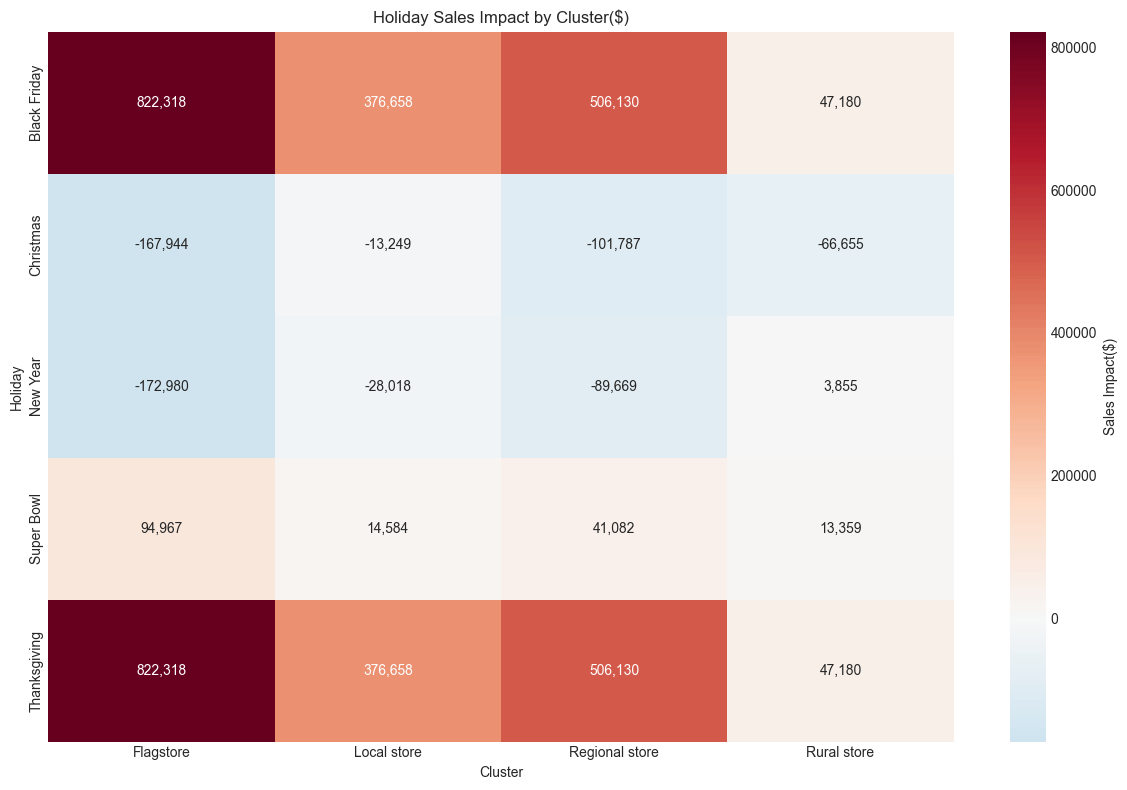

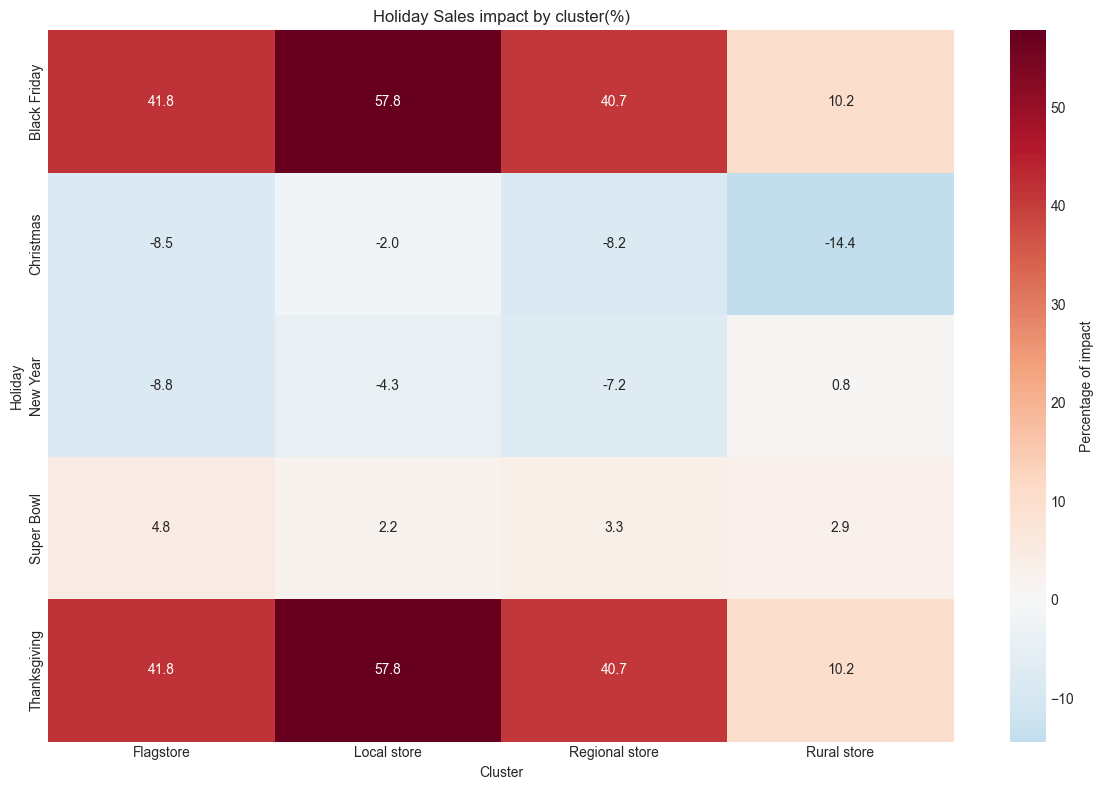

In [2018]:
plt.figure(figsize=(12,8))
pivot_df = impact_df.pivot(index='Holiday',columns='Cluster',values='Impact')
sns.heatmap(pivot_df,annot=True,fmt=',.0f',cmap='RdBu_r',center=0,
            annot_kws={'size':10},cbar_kws={'label':'Sales Impact($)'})
plt.title('Holiday Sales Impact by Cluster($)')
plt.tight_layout()
plt.show()

# Percentage impact heatmap 
plt.figure(figsize=(12,8))
pivot_pct = impact_df.pivot(index='Holiday',columns='Cluster',values='Percentage of impact')
sns.heatmap(pivot_pct,annot=True, fmt=',.1f', cmap='RdBu_r', center=0,
            annot_kws={'size': 10}, cbar_kws={'label': 'Percentage of impact'})
plt.title('Holiday Sales impact by cluster(%)')
plt.tight_layout()
plt.show()



### Insights and Strategies
1. Black Friday & Thanksgiving (High positive uplift across clusters)
Consistently strong uplift (>40% in Flagstore, Local, Regional).
Even Rural stores benefit moderately (~10%).
→ These holidays are proven revenue drivers and should remain central to campaign planning

> 1 uplift model for Black Friday + Thanksgiving (growth focus)
- Identify which customer/store segments respond strongly to maximize ROI on promos
- Use as main forecast + uplift modeling driver

2. Christmas & New Year (Negative impact in most clusters)
Sales actually dip during these periods (especially Rural stores: -14.4%).
This suggests potential cannibalization (customers may shift spend to other times) or weaker holiday relevance.

> 1 uplift model for Christmas + New Year (risk mitigation)
- Identify segments likely to underperform 
- Test counter-strategies (bundles, early promotions, or shifting budget).

3. Super Bowl (Small positive but weak uplift)
Slight improvements (2–5%), not strong across clusters.
Could be leveraged only if cost-efficient promotions are possible.

> 1 uplift model for Super Bowl (niche targeting)
- Detect niche audiences (e.g., sports-driven regions or demographics).

### Cluster-specific holiday strategy
- For Local store --- Maximine promos during Black Friday and Thanksgiving  
- Rural store --- Avoid heavy promos during Christmas and New Year(risk of loss), instaed pushi low-cost targeted offers
- Flagstore --- maintain holiday campaigns but test cross-event retention strategies
### Budget reallocation 
- shift more ads spend and inventory towards Black friday/ Thanksgiving 
- Minimize spending on Christmas/ New year campaigns unless an uplift model identifies profitable micro-segments
### Testing & Experimentation
- A/B test holiday timing shifts (pre-Chritmas and post New year)
- Super Bowl, test localized promos only in clusters showing above-average sports-related demand 

In [2019]:
# create one-hot encoding 
holiday_dummies = pd.get_dummies(df['Holiday_Name'],prefix='Holiday')
df =  pd.concat([df,holiday_dummies],axis=1)

# create general holiday flag
df['Is_Holiday_Week'] = df['Holiday_Name'].notna().astype(int)

print("\nNew holiday columns created:")
holiday_cols = [col for col in df.columns if 'Holiday_' in col]
print(holiday_cols)

print(f"\nHoliday week flag distribution:")
print(df['Is_Holiday_Week'].value_counts())


New holiday columns created:
['Holiday_Flag', 'Holiday_Name', 'Holiday_Black Friday', 'Holiday_Christmas', 'Holiday_New Year', 'Holiday_Super Bowl', 'Holiday_Thanksgiving', 'Is_Holiday_Week']

Holiday week flag distribution:
Is_Holiday_Week
0    6030
1     495
Name: count, dtype: int64


Qini Score: 11,202,775
Normalized Qini Score: 0.312


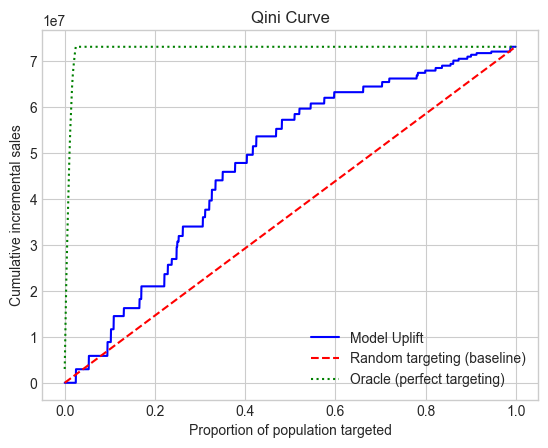

In [2020]:
# Uplift Model 1 : Black Friday and Thanksgiving(high-performing holidays)
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import auc

# Treatment = 1 if Black Friday OR Thanksgiving, else 0
df["treatment_flag"] = (
    df["Holiday_Black Friday"].astype(int) | df["Holiday_Thanksgiving"].astype(int)
)

# Define features (X) and target (y)
df = df.sort_values(['Store','Date'])
df['sales_lag_1'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df['sales_lag_2'] = df.groupby('Store')['Weekly_Sales'].shift(2)
df['sales_moving_avg_4'] = (
    df.groupby('Store')['Weekly_Sales']
    .rolling(window=4)
    .mean()
    .reset_index(level=0,drop=True))

# Step 1: Define Features & Treatment

features = [
    "Store", "Temperature", "Fuel_Price", "CPI", "Unemployment", 
    "Clusters", "sales_lag_1", "sales_lag_2", "sales_moving_avg_4"
]

X = df[features]
y = df['Weekly_Sales']
t = df['treatment_flag'] # treatment assignment

# Step 2: Split data

X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(
    X, y, t, test_size=0.3, random_state=42
)

# split into control/treatment
control_idx = (t_train == 0)
treat_idx = (t_train == 1)

X_control, y_control = X_train[control_idx],y_train[control_idx]
X_treat,y_treat = X_train[treat_idx],y_train[treat_idx]

# Step 3 : Train T-learner(two models)
# Model A : control froup (t=0,no Black Friday / Thanksgiving) , Model B : Treamtment group (t=1. holiday weeks)
control_model = XGBRegressor(random_state=42,n_estimators=500, max_depth=4, learning_rate=0.01) 
treat_model = XGBRegressor(random_state=42,n_estimators=500, max_depth=4, learning_rate=0.01)

control_model.fit(X_control,y_control)
treat_model.fit(X_treat,y_treat)


# Step 4: Predict outcomes & compute uplift
y_pred_control = control_model.predict(X_test)
y_pred_treat = treat_model.predict(X_test)

#Predcit all dataset
y_pred_ctrl = control_model.predict(X)
y_pred_te = treat_model.predict(X)

# uplift = difference
uplift = y_pred_treat - y_pred_control
uplift_all = y_pred_te - y_pred_ctrl


df_evaluation = X_test.copy()
df_evaluation['Weekly_Sales'] = y_test.values
df_evaluation['treatment_flag'] = t_test.values
df_evaluation['uplift'] = uplift

# Step 5: Qini Score Function

def qini_score(df,uplift_col='uplift',treat_col='treatment_flag',outcome_col='Weekly_Sales'):
    df_sorted = df.sort_values(uplift_col, ascending=False).reset_index(drop=True)
    df_sorted["actual_te"] = np.where(df_sorted[treat_col]==1,
                                      df_sorted[outcome_col],
                                      0)
    
    cum_gain = df_sorted["actual_te"].cumsum()
    total_gain = cum_gain.iloc[-1]
    
    random_baseline = np.linspace(0, total_gain, len(df_sorted))
    cum_gain_oracle = df_sorted["actual_te"].sort_values(ascending=False).cumsum()
    x = np.arange(len(df_sorted)) / len(df_sorted)
    
    model_area = auc(x, cum_gain)
    random_area = auc(x, random_baseline)
    oracle_area = auc(x, cum_gain_oracle)

    qini = model_area - random_area
    qini_norm = qini / (oracle_area - random_area)
    return qini, qini_norm, x, cum_gain, random_baseline, cum_gain_oracle

# Step 6 : Manual uplift Evaluation
qini, qini_norm, x, cum_gain, random_baseline, oracle = qini_score(df_evaluation)

print(f"Qini Score: {qini:,.0f}")
print(f"Normalized Qini Score: {qini_norm:.3f}")

# Step 7: Plot Qini Curve
plt.plot(x, cum_gain,label="Model Uplift", color='blue')
plt.plot(x, random_baseline, label="Random targeting (baseline)", linestyle="--", color="red")
plt.plot(x, oracle, label="Oracle (perfect targeting)", linestyle=":", color="green")
plt.xlabel("Proportion of population targeted")
plt.ylabel("Cumulative incremental sales")
plt.title("Qini Curve")
plt.legend()
plt.show()

# Business Interpretation from plot
- Strong early uplift:
When targeting the top 20–30% of stores ranked by predicted uplift, the blue curve rises much faster than the random baseline. The model effectively identifies the most holiday-sensitive stores that generate disproportionately higher incremental sales when promotions are applied.
- Diminishing Returns Beyond ~ 70% 
After around 70% of stores targeted, the uplift curve flattens and approaches the random baseline. This indicates that beyond this point, promotions add little extra incremental revenue. In practice, lower-ranked stores is less cost-effective.



In [2021]:
# Where to act ? 
# top 30% high-uplift stores
df['uplift']= uplift_all
store_uplift = df.groupby('Store')['uplift'].mean().reset_index()
store_uplift = store_uplift.sort_values('uplift',ascending=False)
top30_stores = store_uplift.head(30)

# cluster-level uplift
cluster_uplift= df.groupby('Cluster_Category')['uplift'].mean().reset_index().sort_values('uplift',ascending=False)
print("Top30 high-uplift stores:")
print(top30_stores.head())
print("Cluster uplift:")
print(cluster_uplift)


Top30 high-uplift stores:
    Store       uplift
12     13  683191.8125
9      10  670934.7500
13     14  664330.9375
3       4  655631.9375
26     27  646995.1875
Cluster uplift:
  Cluster_Category         uplift
0        Flagstore  644265.000000
2   Regional store  404864.281250
1      Local store  259697.171875
3      Rural store   82634.296875


# Strategies
- 1. Focused Promotions: Concentrate holiday campaigns on the top 20–40% uplift-ranked stores. These stores deliver the highest ROI. Avoid blanket promos as low-ranked stores don't provide significant incremental gains, it will dilutes profitability
- 2. Pilot Test: Use the top-ranked stores to pilot new holiday campaigns. Their response can be used to refine future promotional strategies.
- 3. Resource Allocation: Allocate more budget, stock, and marketing spend toward high-uplift clusters(such as Flagstore and Reginal store) rather than low-uplift clusters(Rural) 

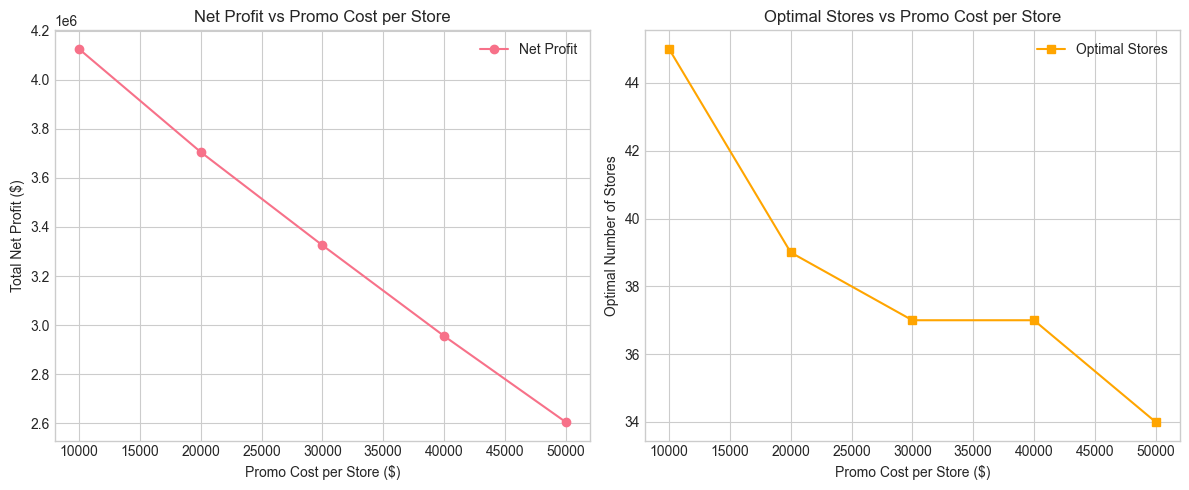

   Promo_Cost_Per_Store  AVG_uplift  Total_Gross_Profit  Total_Net_Profit  \
0                 10000  15252621.0           4575787.0        4125787.00   
1                 20000  14952085.0           4485624.5        3705625.25   
2                 30000  14785114.0           4435533.5        3325534.25   
3                 40000  14785114.0           4435533.5        2955534.25   
4                 50000  14348880.0           4304663.5        2604664.00   

   Total_Cost  Optimal_Stores       ROI_%  
0      450000              45  916.841556  
1      780000              39  475.080160  
2     1110000              37  299.597680  
3     1480000              37  199.698260  
4     1700000              34  153.215529  


In [2022]:
# Profitability estimation function
def calculate_promo_profit(stores,promo_cost_per_store,margin_rate=0.3):
    df = stores.copy()
    # Gross profit = uplift * margin
    df['gross_profit'] = df['uplift']*margin_rate
    # Net profit = gross profit - promo cost
    df['net_profit']=df['gross_profit']-promo_cost_per_store
    
    # Create summary (aggregate)
    summary = {
        'Promo_Cost_Per_Store':promo_cost_per_store,
        "AVG_uplift": df["uplift"].sum(),
        "Total_Gross_Profit": df["gross_profit"].sum(),
        "Total_Net_Profit": df["net_profit"].sum(),
        "Total_Cost": len(df) * promo_cost_per_store,
        }
    
    return df, summary

def compare_promo_scenarios(store_uplift,promo_cost_levels=[10000,20000,30000,40000,50000],margin_rate=0.3):
    
    results=[]
    
    for cost in promo_cost_levels:
       best_net_profit = -float('inf')
       best_n = None
       best_summary = None
       
       # Loop over possible top-n stores (1 to all stores)
       for n in range(1,len(store_uplift)+1):
           topN_stores = store_uplift.head(n)
           _,summary = calculate_promo_profit(topN_stores,promo_cost_per_store=cost,margin_rate=margin_rate)
           net_profit = summary['Total_Net_Profit']
           
           if net_profit > best_net_profit:
               best_net_profit = net_profit
               best_n = n
               best_summary = summary
               
        # Append best scenario for this promo cost
        # ROI = net profit / cost
       best_summary["Optimal_Stores"] = best_n
       best_summary["Promo_Cost_Per_Store"] = cost
       best_summary["ROI_%"] = (best_summary["Total_Net_Profit"] / best_summary["Total_Cost"]) * 100
       results.append(best_summary)
       
    scenario_df = pd.DataFrame(results)
    
     # Plot results
     # --- Plot 1: Total Net Profit vs Promo Cost ---
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(scenario_df["Promo_Cost_Per_Store"], scenario_df["Total_Net_Profit"], marker="o", label="Net Profit")
    plt.xlabel("Promo Cost per Store ($)")
    plt.ylabel("Total Net Profit ($)")
    plt.title("Net Profit vs Promo Cost per Store")
    plt.legend()

    # --- Plot 2: Optimal Stores vs Promo Cost ---
    plt.subplot(1,2,2)
    plt.plot(scenario_df["Promo_Cost_Per_Store"], scenario_df["Optimal_Stores"], marker="s", color="orange", label="Optimal Stores")
    plt.xlabel("Promo Cost per Store ($)")
    plt.ylabel("Optimal Number of Stores")
    plt.title("Optimal Stores vs Promo Cost per Store")
    plt.legend()

    plt.tight_layout()
    plt.show()

    return scenario_df
    
    
scenarios = compare_promo_scenarios(store_uplift,promo_cost_levels=[10000,20000,30000,40000,50000],margin_rate=0.3)
print(scenarios)

#### Insights:
- Net profit is highest at a $10K promo cost per store, generating $412K net profit across 45 stores.
- At lower promo costs ($10K–$20K/store), the model selects more stores (39–45) as optimal.
- ROI is extremely high at $10K/store (~917%), but falls sharply as cost rises:
$20K/store: 475%, $30K/store: 300% , $50K/store: 153%, This indicates that incremental spending per store delivers diminishing returns.
- Lower-cost promotions ($10K–$20K/store) deliver the best ROI and sustain higher net profits. At higher costs, even though gross profit remains stable, additional promo spending erodes margins.
- Campaigns should focus on top 35–45 high-uplift stores.
### Strategy :
1. Run leaner promotions --- Prioritize $10K–$20K per store budgets, focused on top 40 high-uplift stores.
2. Focus investment --- Target the top 40 uplift stores, If budget allows, scale to $20K/store, but avoid exceeding $30K/store unless strategic branding goals outweigh ROI
3. Ongoing Optimization: Reassess uplift data post-campaign to validate model assumptions and refine store selection + budget allocation.


In [2023]:

# Minimize loss by quantifying how much sales dip occurs and evaluating mitigation strategies

def evaluate_NY_Christmas(
    baseline_sales,
    observed_dips,   # negative_uplift_value (e.g., -0.144 for -14.4%)
    mitigation_levels = [0.03,0.06,0.10]   #  3%, 6%, 10%
):
    
    results =[]
    
    for cluster,base in baseline_sales.items():
        dip = observed_dips.get(cluster,0)
        dipped_sales = base * (1+dip)    # dip after the holiday (假期销售额下降)
        
        for mitigation in mitigation_levels:
            mitigation_sales = base * (1+dip+mitigation)  # 缓解销售（mitigation strategy）
            net_gain = mitigation_sales - dipped_sales  #Measures how much the mitigation strategy recovered compared to doing nothing.
            
            results.append({
                "Cluster":cluster,
                "Baseline Sales":base,
                "Observed Dip":f"{dip*100:.1f}%",
                "Mitigation Level":f"{mitigation*100:.0f}%",
                "Sales After Dip":round(dipped_sales,2),
                "Mitigated Sales":round(mitigation_sales,2),
                "Net Gain":round(net_gain,2)
            })
            
    NY_Chris_summary_df = pd.DataFrame(results)
    return NY_Chris_summary_df
            
baseline_sales = (
    df.groupby("Cluster_Category")["Weekly_Sales"]
      .mean()      # or .median() if that's your baseline definition
      .to_dict()
)

observed_dips = {
    "Rural store": -0.144, # keep the worst dip (–14.4%) because Rural is most vulnerable
    "Local store": -0.031,   # exaggerated dip to –7% (vs –3.1%) for conservative planning.
    "Regional store": -0.077,  # smoothed down to –5% (from –7.7%).
    "Flagstore": -0.086  # choose 5%(instead of 8.6%)since flagships usually can absorb losses better.
}

NY_Chrismas_summary = evaluate_NY_Christmas(baseline_sales,observed_dips)
print(NY_Chrismas_summary)


           Cluster  Baseline Sales Observed Dip Mitigation Level  \
0        Flagstore    1.986562e+06        -8.6%               3%   
1        Flagstore    1.986562e+06        -8.6%               6%   
2        Flagstore    1.986562e+06        -8.6%              10%   
3      Local store    6.619334e+05        -3.1%               3%   
4      Local store    6.619334e+05        -3.1%               6%   
5      Local store    6.619334e+05        -3.1%              10%   
6   Regional store    1.255648e+06        -7.7%               3%   
7   Regional store    1.255648e+06        -7.7%               6%   
8   Regional store    1.255648e+06        -7.7%              10%   
9      Rural store    4.646259e+05       -14.4%               3%   
10     Rural store    4.646259e+05       -14.4%               6%   
11     Rural store    4.646259e+05       -14.4%              10%   

    Sales After Dip  Mitigated Sales   Net Gain  
0        1815717.72       1875314.58   59596.86  
1        181571

### Baseline dip:
Without action, sales in Flagstore decline 8.6%,Regional store deline 7.7%, Local store decline 3.1%, Rural store decline 14.4%
### Mitigation Strategy Options:
Light (3–6%): modest uplift, low cost (e.g., loyalty boost, targeted ads,holiday events, demos, limited holiday bundle editions).
- Use 3% in Local store(-3.1%,low cost)(e.g.)
- Use 6% in flagstore(-8.6%) and Regional store(-7.7%) 

Medium-to-High(10%): stronger uplift, medium cost (discounts, holiday bundles,delivery promos,online campaigns,Gift-Centric Marketing / Seasonal SKUs).
- Use heavy mitigation 10% only in critical clusters (Rural stores only Christmas),3% for New year

Qini Score for Super Bowl: 7,478,688
Normalized Qini Score for Super bowl: 0.452


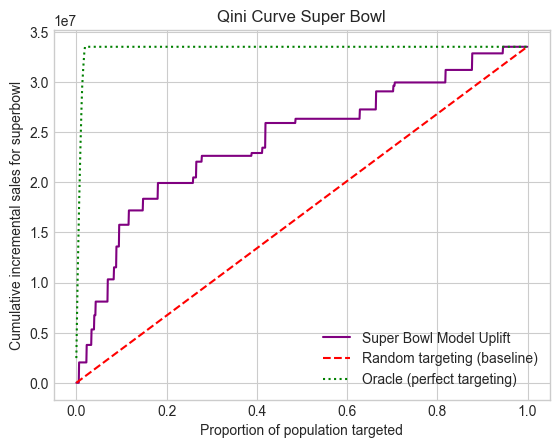

Top20 high-uplift stores for Superbowl:
    Store        uplift
12     13  683191.81250
9      10  670934.75000
13     14  664330.93750
3       4  655631.93750
26     27  646995.18750
1       2  600356.87500
19     20  588413.25000
5       6  490302.34375
0       1  478230.56250
38     39  472521.81250
Cluster uplift for super bowl:
  Cluster_Category    uplift_spb
1      Local store  43423.714844
2   Regional store  39546.867188
3      Rural store  32496.017578
0        Flagstore -25460.169922


In [2024]:
# Uplift Model 2 : Super Bowl Promo uplift 
# Treatment = 1 if Super Bowl, else 0
risk_df = df.copy()
risk_df["treatment_flag"] = risk_df["Holiday_Super Bowl"].astype(int)

# Define features (X) and target (y)
risk_df = risk_df.sort_values(['Store','Date'])
risk_df['sales_lag_1'] = risk_df.groupby('Store')['Weekly_Sales'].shift(1)
risk_df['sales_lag_2'] = risk_df.groupby('Store')['Weekly_Sales'].shift(2)
risk_df['sales_moving_avg_4'] = (
    risk_df.groupby('Store')['Weekly_Sales']
    .rolling(window=4)
    .mean()
    .reset_index(level=0,drop=True))
risk_df['dynamic_baseline']= risk_df['sales_moving_avg_4'].fillna(risk_df['Weekly_Sales'])


# Step 1: Define Features & Treatment

features = [
    "Store", "Temperature", "Fuel_Price", "CPI", "Unemployment", 
    "Clusters", "sales_lag_1", "sales_lag_2", "sales_moving_avg_4"
]

X = risk_df[features]
y = risk_df['Weekly_Sales']
t = risk_df['treatment_flag'] # treatment assignment

# Step 2: Split data

X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(
    X, y, t, test_size=0.2, random_state=42
)

# split into control/treatment
control = (t_train == 0)
treat = (t_train == 1)

X_control, y_control = X_train[control],y_train[control]
X_treat,y_treat = X_train[treat],y_train[treat]

# Step 3 : Train T-learner(two models)
# Model A : control froup (t=0,no Black Friday / Thanksgiving) , Model B : Treamtment group (t=1. holiday weeks)
control_model_spb = XGBRegressor(random_state=42,n_estimators=500, max_depth=4, learning_rate=0.01) 
treat_model_spb= XGBRegressor(random_state=42,n_estimators=500, max_depth=4, learning_rate=0.01)

control_model_spb.fit(X_control,y_control)
treat_model_spb.fit(X_treat,y_treat)


# Step 4: Predict outcomes & compute uplift
y_pred_ctrl = control_model_spb.predict(X_test)
y_pred_te = treat_model_spb.predict(X_test)

#Predcit all dataset
y_pred_ctrl_alldata = control_model_spb.predict(X)
y_pred_te_alldata = treat_model_spb.predict(X)

# uplift 
uplift_superbowl = y_pred_te - y_pred_ctrl
uplift_all_superbowl = y_pred_te_alldata - y_pred_ctrl_alldata


evaluate_superbowl = X_test.copy()
evaluate_superbowl['Weekly_Sales'] = y_test.values
evaluate_superbowl['treatment_flag'] = t_test.values
evaluate_superbowl['uplift_superbowl'] = uplift_superbowl

# Step 5: Qini Score Function

def qini_score(risk_df,uplift_col='uplift_superbowl',treat_col='treatment_flag',outcome_col='Weekly_Sales'):
    df_risk = risk_df.sort_values(uplift_col, ascending=False).reset_index(drop=True)
    df_risk["actual_te"] = np.where(df_risk[treat_col]==1,
                                      df_risk[outcome_col],
                                      0)
    
    cum_gain_spb = df_risk["actual_te"].cumsum()
    total_gain_spb = cum_gain_spb.iloc[-1]
    
    random_baseline_spb = np.linspace(0, total_gain_spb, len(df_risk))
    cum_gain_oracle = df_risk["actual_te"].sort_values(ascending=False).cumsum()
    x_spb = np.arange(len(df_risk)) / len(df_risk)
    
    model_area_spb = auc(x_spb, cum_gain_spb)
    random_area_spb = auc(x_spb, random_baseline_spb)
    oracle_area_spb = auc(x_spb, cum_gain_oracle)

    qini = model_area_spb - random_area_spb
    qini_norm = qini / (oracle_area_spb - random_area_spb)
    
    return qini_spb, qini_norm_spb, x_spb, cum_gain_spb, random_baseline_spb, cum_gain_oracle

# Step 6 : Manual uplift Evaluation
qini_spb, qini_norm_spb, x_spb, cum_gain_spb, random_baseline_spb, oracle_spb = qini_score(evaluate_superbowl)

print(f"Qini Score for Super Bowl: {qini_spb:,.0f}")
print(f"Normalized Qini Score for Super bowl: {qini_norm_spb:.3f}")

plt.plot(x_spb, cum_gain_spb,label="Super Bowl Model Uplift", color='purple')
plt.plot(x_spb, random_baseline_spb, label="Random targeting (baseline)", linestyle="--", color="red")
plt.plot(x_spb, oracle_spb, label="Oracle (perfect targeting)", linestyle=":", color="green")
plt.xlabel("Proportion of population targeted")
plt.ylabel("Cumulative incremental sales for superbowl")
plt.title("Qini Curve Super Bowl")
plt.legend()
plt.show()

# Target top 15-20 most sensitive Super bowl stores 
risk_df['uplift_spb']= uplift_all_superbowl
store_uplift_spb = risk_df.groupby('Store')['uplift_spb'].mean().reset_index().sort_values('uplift_spb',ascending=False)
top_stores_spb = store_uplift.head(20)

# cluster-level uplift
cluster_uplift_spb= risk_df.groupby('Cluster_Category')['uplift_spb'].mean().reset_index().sort_values('uplift_spb',ascending=False)
print("Top20 high-uplift stores for Superbowl:")
print(top_stores_spb.head(10))
print("Cluster uplift for super bowl:")
print(cluster_uplift_spb)

1. Take uplift estimates (per cluster).

2. Apply different promotion cost levels (% of baseline sales or flat costs).

3. Calculate Net Gain vs. Doing Nothing and ROI.

4. Identify which cluster gets the highest ROI at which promo level.

          Cluster  Baseline Sales  Predicted Uplift Promo Cost %  \
0     Local store    6.619334e+05      43423.714844           2%   
1     Local store    6.619334e+05      43423.714844           3%   
2     Local store    6.619334e+05      43423.714844           4%   
3     Local store    6.619334e+05      43423.714844           5%   
4  Regional store    1.255648e+06      39546.867188           2%   

   Net Gain vs Do Nothing       ROI  
0            30185.047250  2.280067  
1            23565.713453  1.186711  
2            16946.379656  0.640033  
3            10327.045860  0.312027  
4            14433.908272  0.574759  


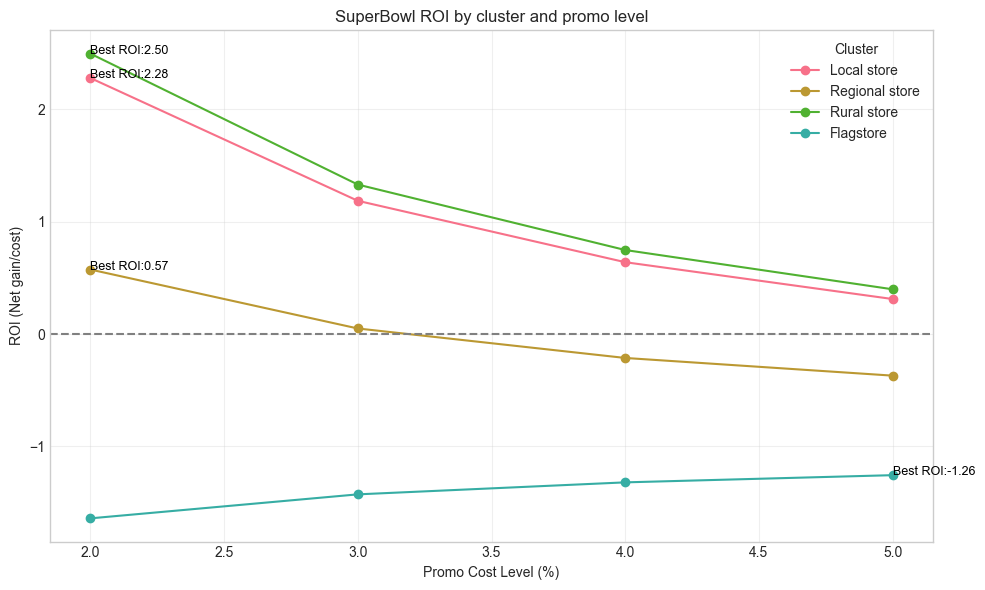

In [2025]:
# Profitbality Estimation Function
def superbowl_profitability(cluster_uplift,baseline_sales,promo_cost_levels=[0.02,0.03,0.04,0.05]):
    
    results = []
    
    for cluster,uplift in cluster_uplift.items():
        base_sales = baseline_sales.get(cluster,0)
        
        for promo_pct in promo_cost_levels:
            promo_cost = base_sales * promo_pct   # investment cost
            net_gain_spb = uplift - promo_cost
            roi = (net_gain_spb / promo_cost) if promo_cost > 0 else 0
            
            results.append({
                "Cluster":cluster,
                "Baseline Sales":base_sales,
                "Predicted Uplift":uplift,
                "Promo Cost %":f"{int(promo_pct*100)}%",
                "Net Gain vs Do Nothing":net_gain_spb,
                "ROI":roi
            })
            
    df_superbowl = pd.DataFrame(results)
    return df_superbowl

cluster_uplift_spb['uplift_spb'] = pd.to_numeric(cluster_uplift_spb['uplift_spb'],errors='coerce')
cluster_uplift = dict(zip(cluster_uplift_spb['Cluster_Category'],cluster_uplift_spb['uplift_spb']))


df_superbowl = superbowl_profitability(cluster_uplift,baseline_sales)
print(df_superbowl.head())


def plot_superbowl_roi(df_superbowl):
    clusters = df_superbowl['Cluster'].unique()
    plt.figure(figsize=(10,6))
    
    for cluster in clusters:
        cluster_df = df_superbowl[df_superbowl['Cluster']==cluster]
        
        # x = promo cost % (as numbers instead of strings for plotting)
        x = cluster_df["Promo Cost %"].str.replace("%","").astype(int)
        y = cluster_df['ROI']
        
        plt.plot(x,y,marker="o",label=cluster)
        
        # Annotate best ROI point
        best_idx = y.idxmax()
        plt.text(x.loc[best_idx],y.loc[best_idx],
                 f"Best ROI:{y.loc[best_idx]:.2f}",fontsize=9,color='black')
        
    plt.axhline(0,color='grey',linestyle="--")
    plt.title("SuperBowl ROI by cluster and promo level")
    plt.xlabel("Promo Cost Level (%)")
    plt.ylabel("ROI (Net gain/cost)")
    plt.legend(title="Cluster")
    plt.grid(True,alpha=0.3)
    plt.tight_layout()
    plt.show()
        
plot_superbowl_roi(df_superbowl)


1. Focus on top 20 stores to apply for strategies. Some specific stores (13, 10, 14, 4, 27) show very high absolute uplift (>$640k each). These are Superbowl-sensitive stores → they’ tactical targets for heavy campaigns. 
> Choose 5% promo_cost for the top5 stores

### 2. Strategies 
> 3% promo_cost : Local store: +43k uplift --- these customers are event-driven, looking for convenience and party-ready packs.
-  Party Bundles: snack + beverage packs, “Superbowl Family Pack” at attractive price points.
- Micro-promotions: run short-term buy 2, get 1 free for high-consumption SKUs (chips, soda, beer).
- In-store displays: heavy Superbowl branding, cross-merchandising aisles.
- 👉 Goal = maximize basket size & impulse buys

> 3% promo_cost : Rural store: +32k uplift --- positive uplift ut smaller, Rural shoppers may be more price sensitive, travel less, and buy in bulk.
- Bulk Discounts: “Family Size Packs” for chips, soda, frozen pizzas.
- Fuel/Travel tie-in: partner discounts (gas coupons with Superbowl bundles).
- Early Promotions: rural shoppers may stock up earlier in the week, so start Superbowl promos earlier than urban areas.
- 👉 Goal = secure spend earlier, reduce lost opportunity due to distance/stockouts.

> 2% promo cost: Regional store: +39k uplift --- medium-density areas where promotions will work but at a more moderate scale.
- Localized Campaigns: regional TV/radio ads or targeted geo-fenced digital ads before the game.
- Click & Collect: promote “order online, pick up before game day.” Convenience + assurance of stock
- Cross-sell Essentials: promote grilling meat, condiments, drinks → align with Superbowl gatherings.
- 👉 Goal = capture mid-size gatherings, drive cross-category uplift.


> No promo: Flagstore: –25k (negative uplift) → promotions here could actually cannibalize sales or are ineffective. Avoid promos or use experimential marketing instead 